In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
import mplcursors
import csv

In [2]:
def beta_irt(thetai, deltaj, aj):
    p1 = ((deltaj)/(1 - deltaj))** aj
    p2 = ((thetai)/(1 - thetai))** -aj
    den = 1 + p1 * p2
    return 1/den

In [3]:
users = open("./../MovieLens/basic/users_basic_sample_section.csv").read().split('\n')

In [4]:
##### PARAMETERS #####
params_file = "./Results/BIRT/300 users/irt_parameters_vi_recommendation_s300_f20_sd1_am1@0_as1@0.csv"
params = pd.read_csv(params_file)
params = params.values

In [28]:
params1 = [dif for dif, _ in params]
params2 = [disc for _, disc in params]

In [32]:
dif_c = [dif for dif, _ in params]
disc_c = [disc for _, disc in params]

In [5]:
##### PARAMETERS #####
responses_file = "./Results/BIRT/300 users/irt_data_recommendation_s300_f20_sd1.csv"
responses = pd.read_csv(responses_file)
responses = responses.values

In [29]:
dif_params = list(zip(users, params1, responses))
dif_params.sort(key=lambda x: x[1])

disc_params = list(zip(users, params2, responses))
disc_params.sort(key=lambda x: x[1])

In [67]:
new_params

[('302',
  0.24964014,
  array([0.59811964, 0.55923595, 0.53436677, 0.58674452, 0.60433312,
         0.59456493, 0.66466755, 0.40292028, 0.58281602, 0.61238116])),
 ('435',
  0.3057419,
  array([0.65104972, 0.66308409, 0.62342909, 0.53787548, 0.65171616,
         0.6464604 , 0.60286446, 0.46222139, 0.63064503, 0.64455165])),
 ('290',
  0.31693709999999997,
  array([0.63272103, 0.59227534, 0.62081888, 0.60542216, 0.65094906,
         0.61776058, 0.62929585, 0.42842926, 0.63018703, 0.63912766])),
 ('300',
  0.3242717,
  array([0.53836511, 0.47173114, 0.55546762, 0.55685446, 0.53731388,
         0.48471545, 0.54263663, 0.4094474 , 0.56172929, 0.54010803])),
 ('346',
  0.33151907,
  array([0.63157509, 0.60691557, 0.63763589, 0.61144735, 0.60908243,
         0.61290693, 0.60880199, 0.46867054, 0.64701264, 0.60419968])),
 ('315',
  0.34265712,
  array([0.60399727, 0.53532002, 0.59531878, 0.52805227, 0.54914504,
         0.56732   , 0.57064198, 0.45965839, 0.60738745, 0.58632025])),
 ('359',


In [26]:
baseline = responses['KNNWithMeans_UserBased'].values
to_compare = responses.drop(columns=['KNNWithMeans_UserBased'])

In [29]:
from statistics import mean, stdev

mean(dif_c), stdev(dif_c), mean(disc_c), stdev(disc_c)

(0.4954815828333333,
 0.06222363022652016,
 0.32335017094533336,
 0.15926391022089192)

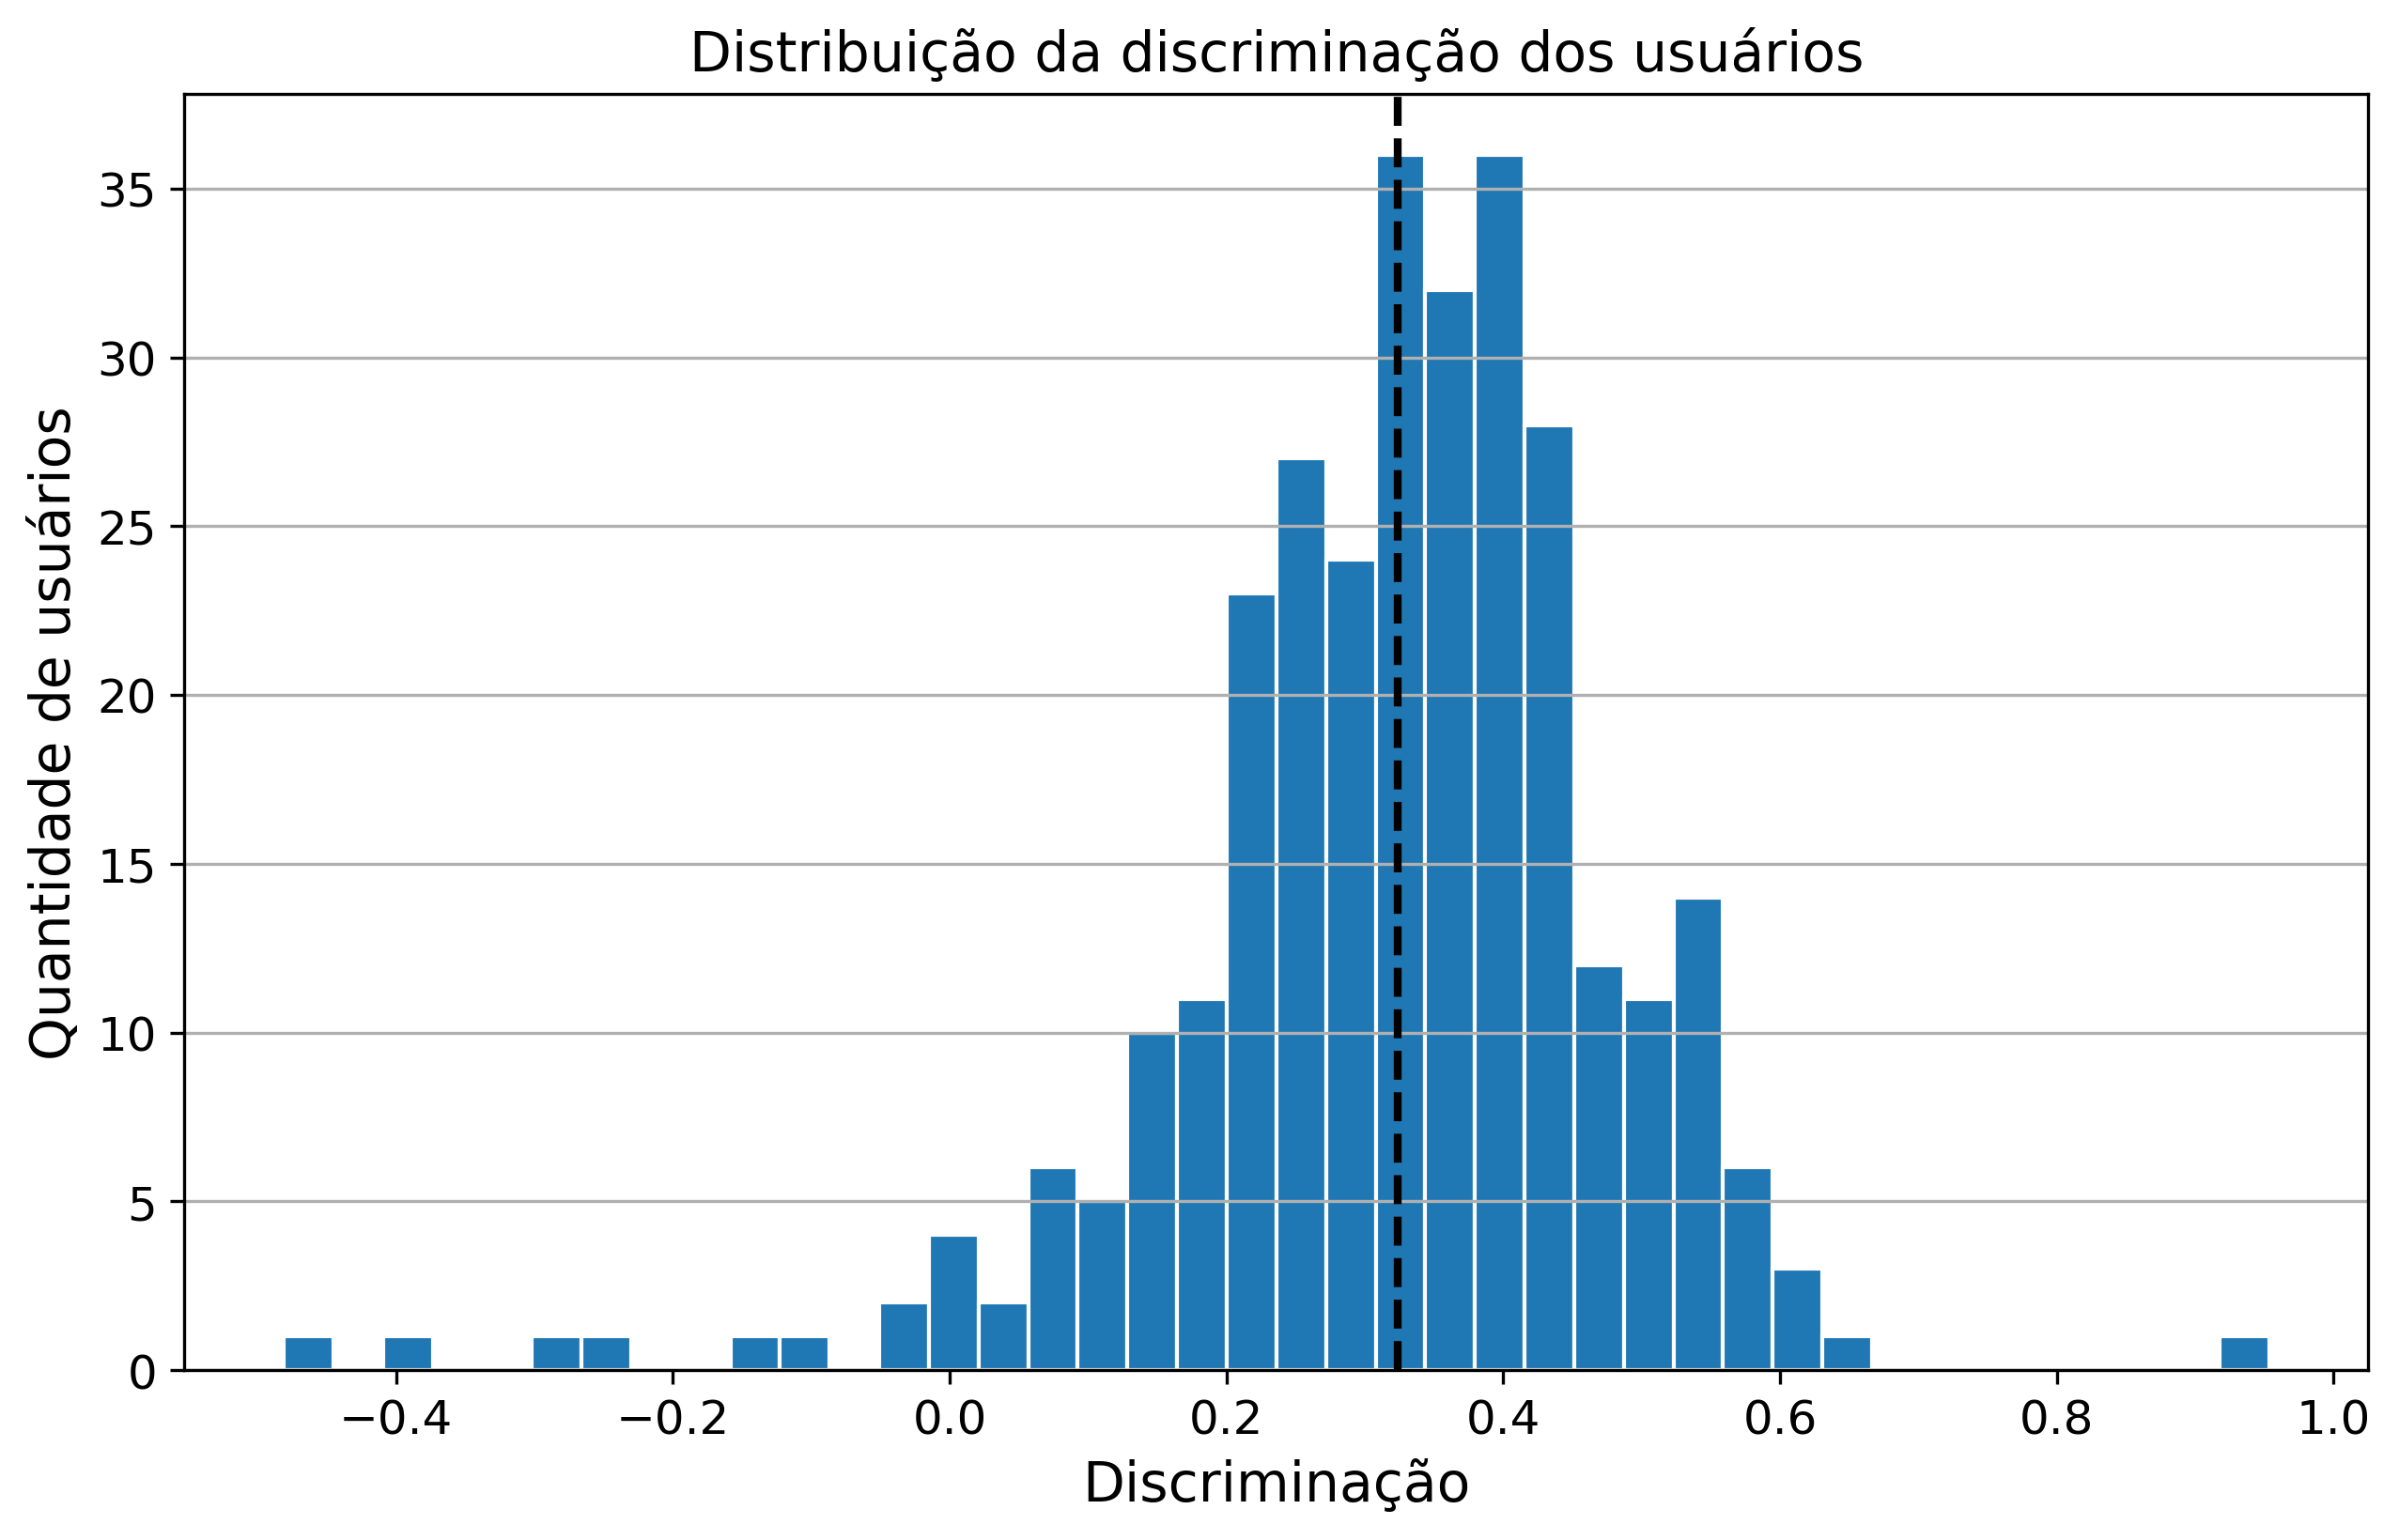

In [38]:
fig = plt.figure(figsize = (10,6), dpi=300)
plt.hist(disc_c, bins=40, edgecolor='white')
plt.axvline(sum(disc_c)/len(disc_c), color='k', linestyle='dashed', linewidth=2)
plt.grid(axis='y')
plt.title("Distribuição da discriminação dos usuários", fontsize=14)
plt.xlabel("Discriminação", fontsize=14)
plt.ylabel("Quantidade de usuários", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./discrimination distribution.png'.format(alg))

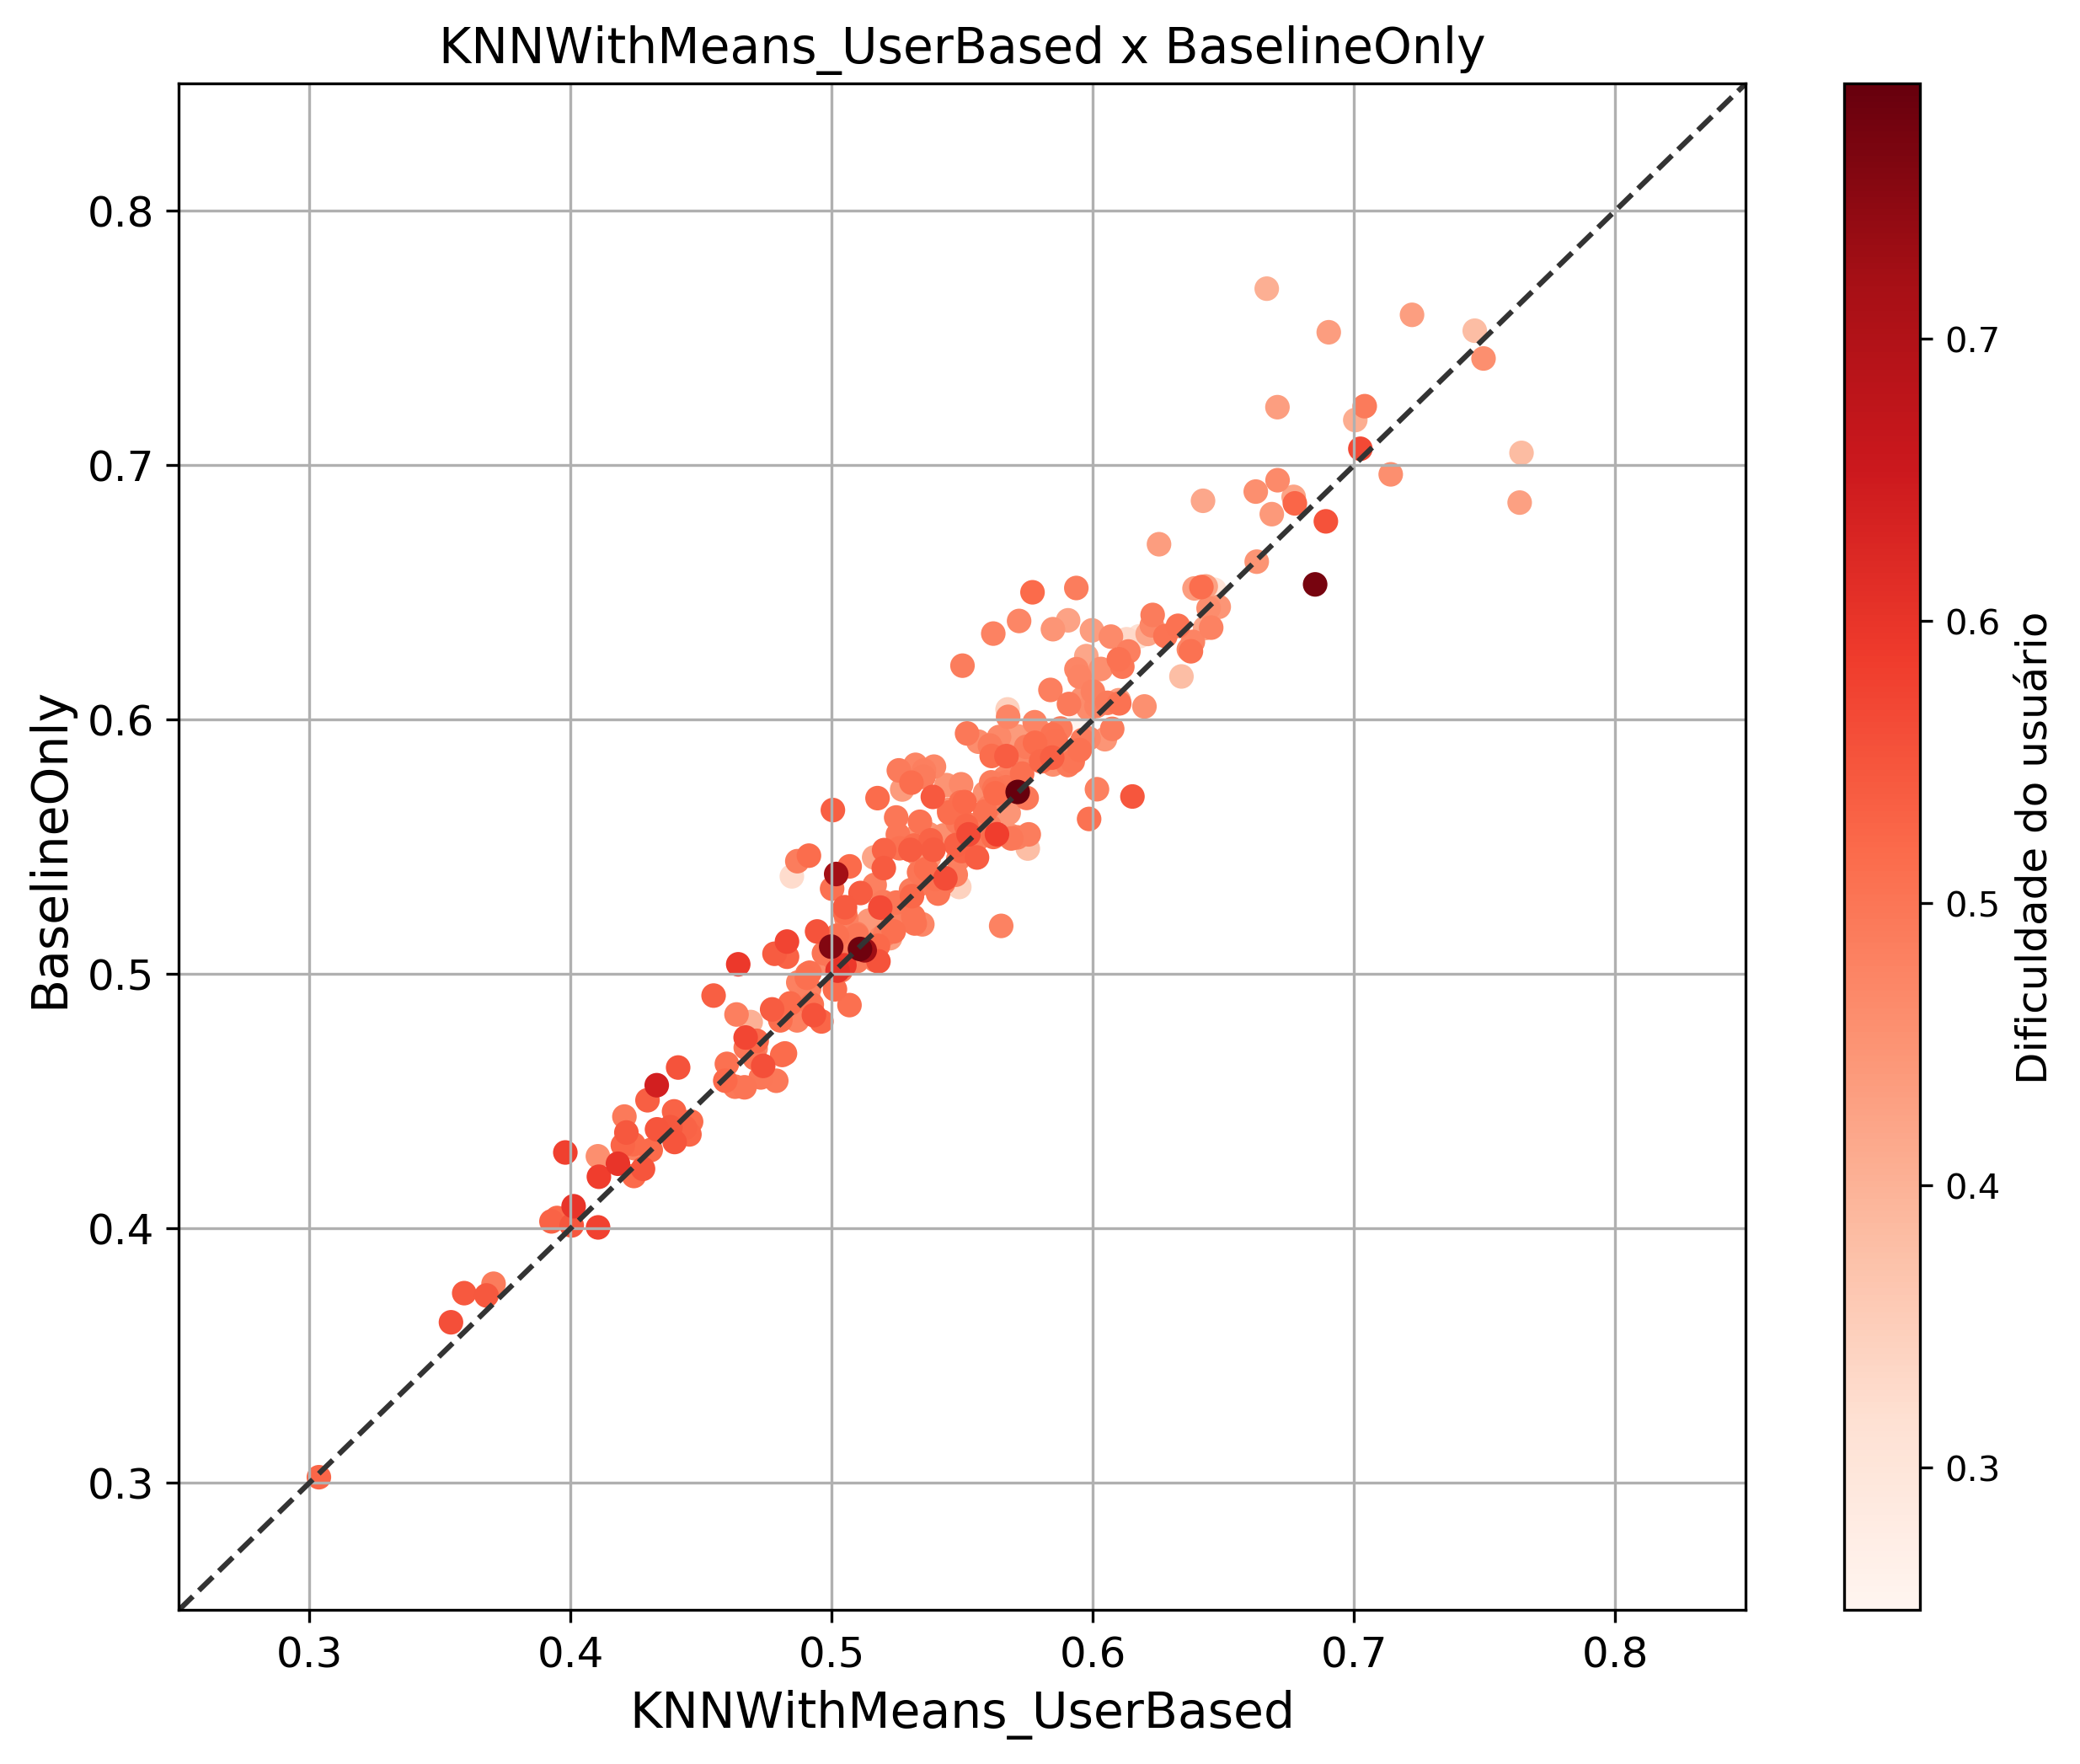

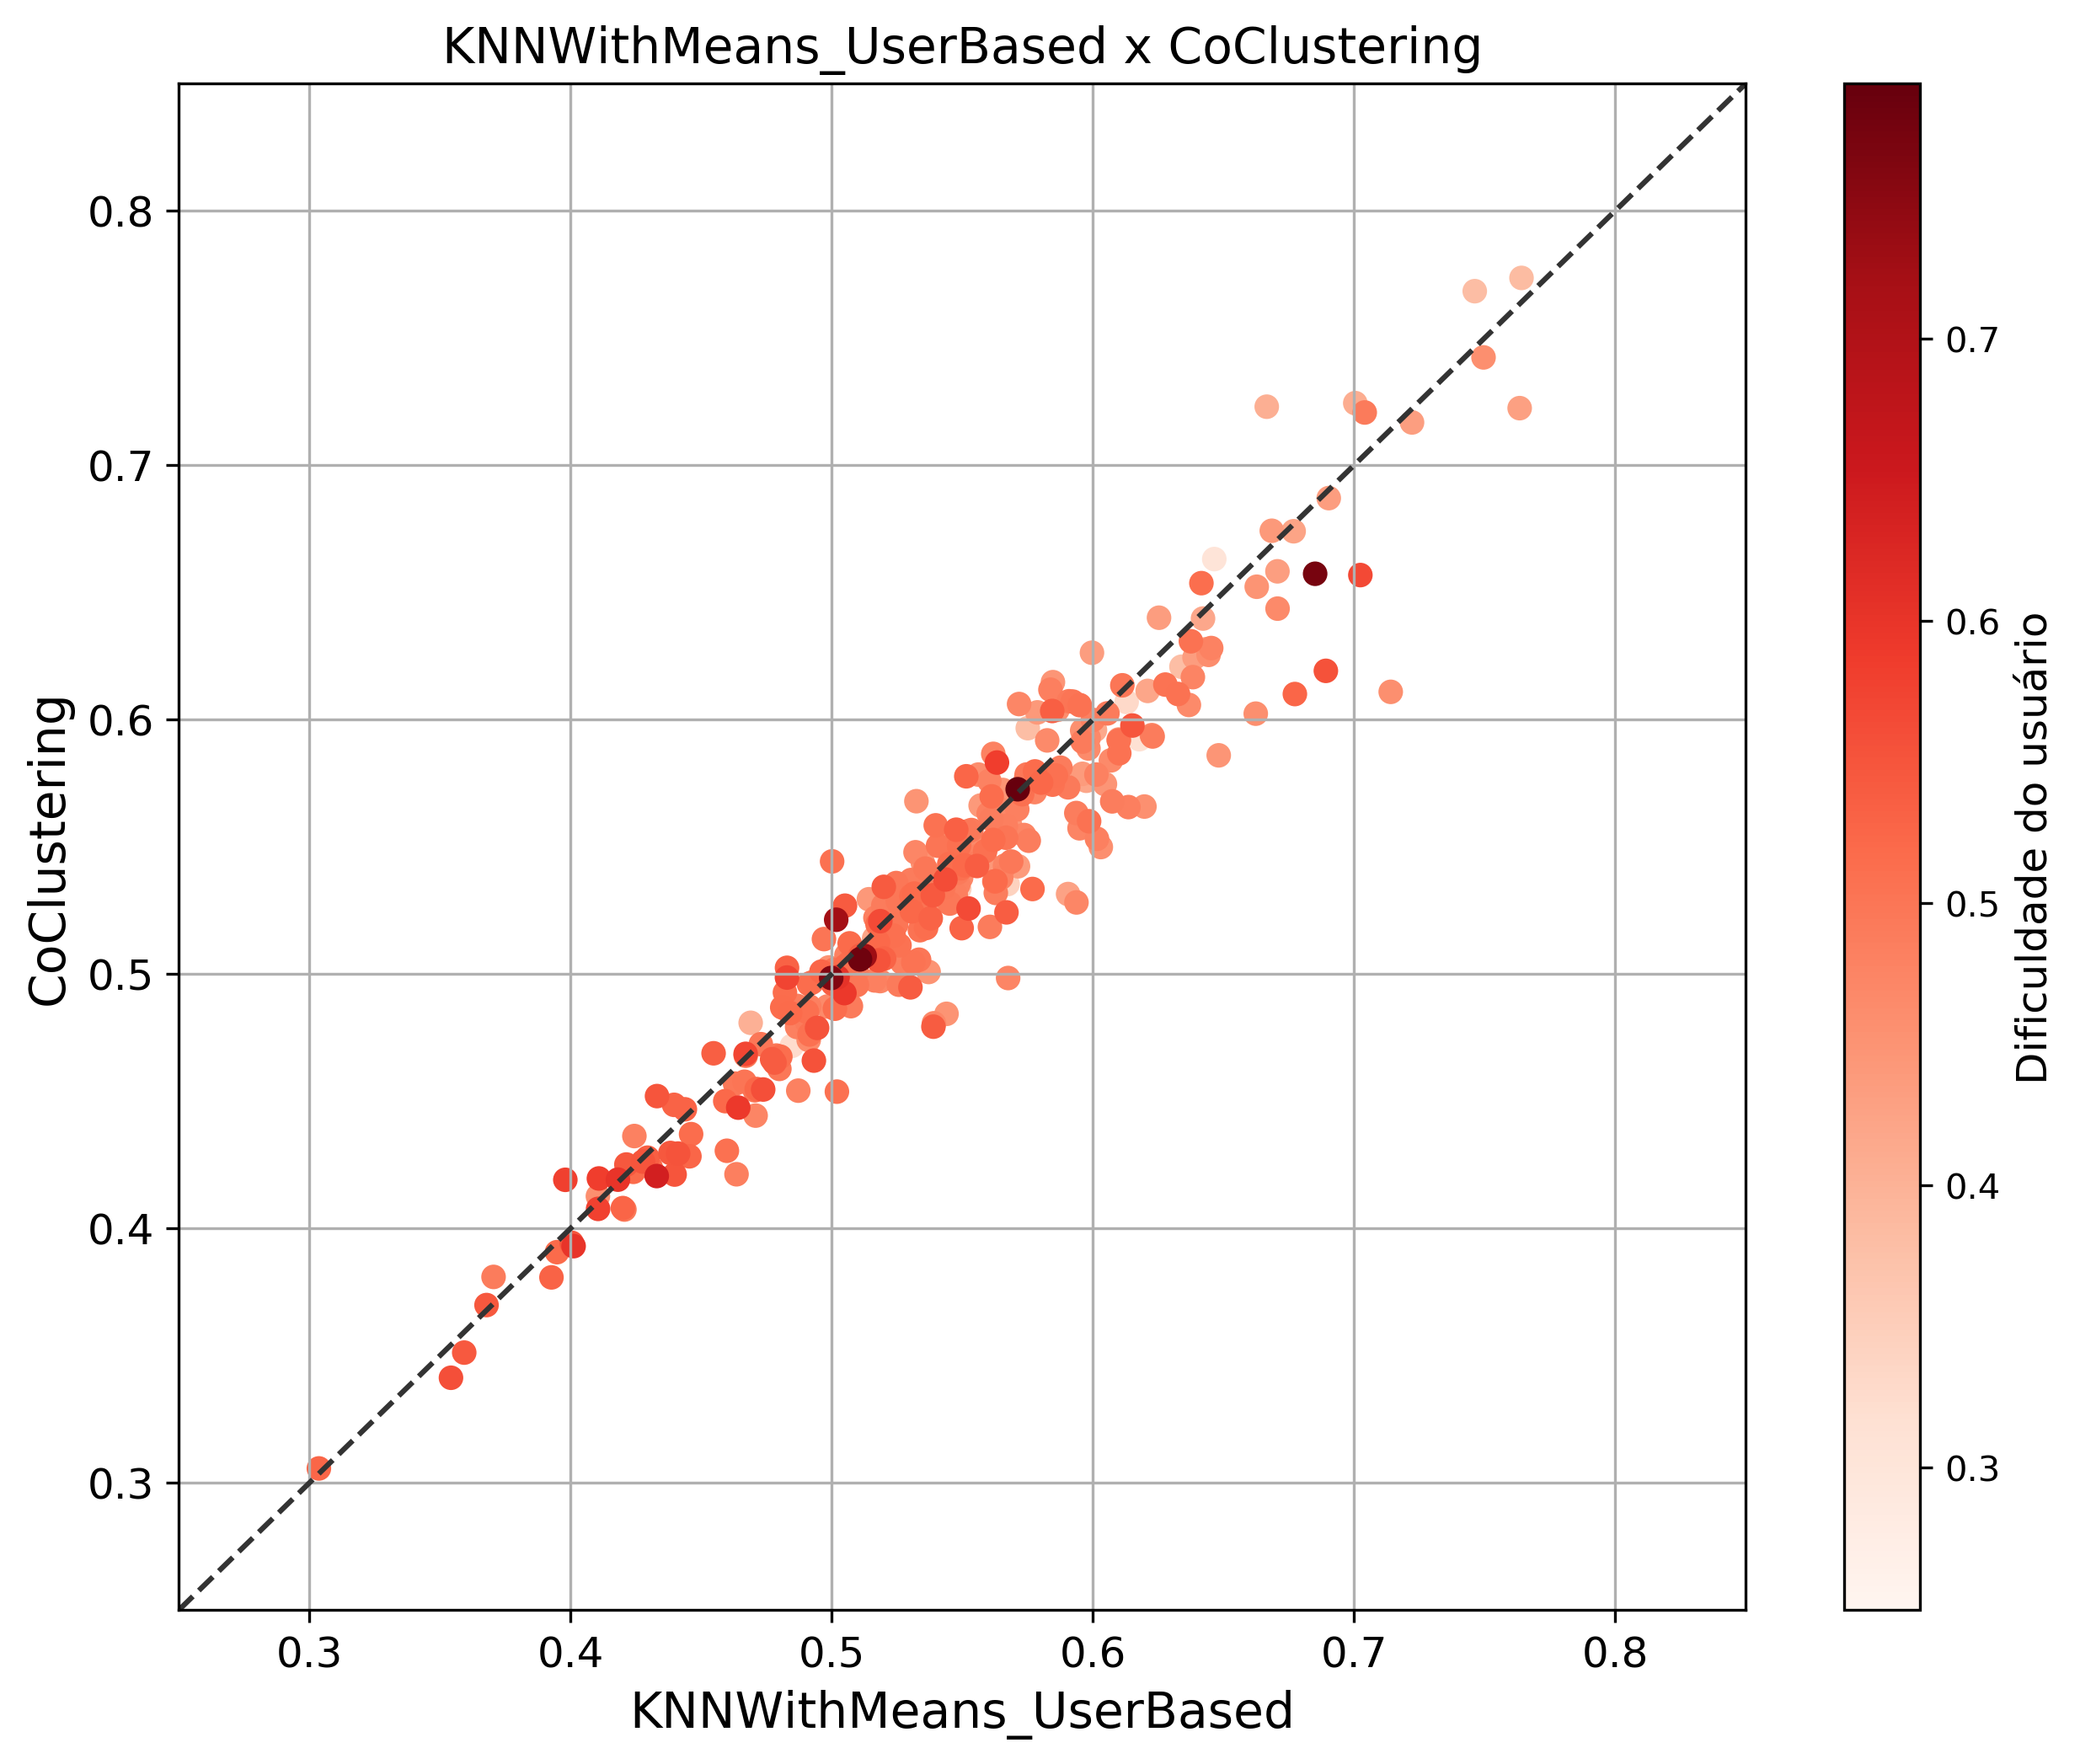

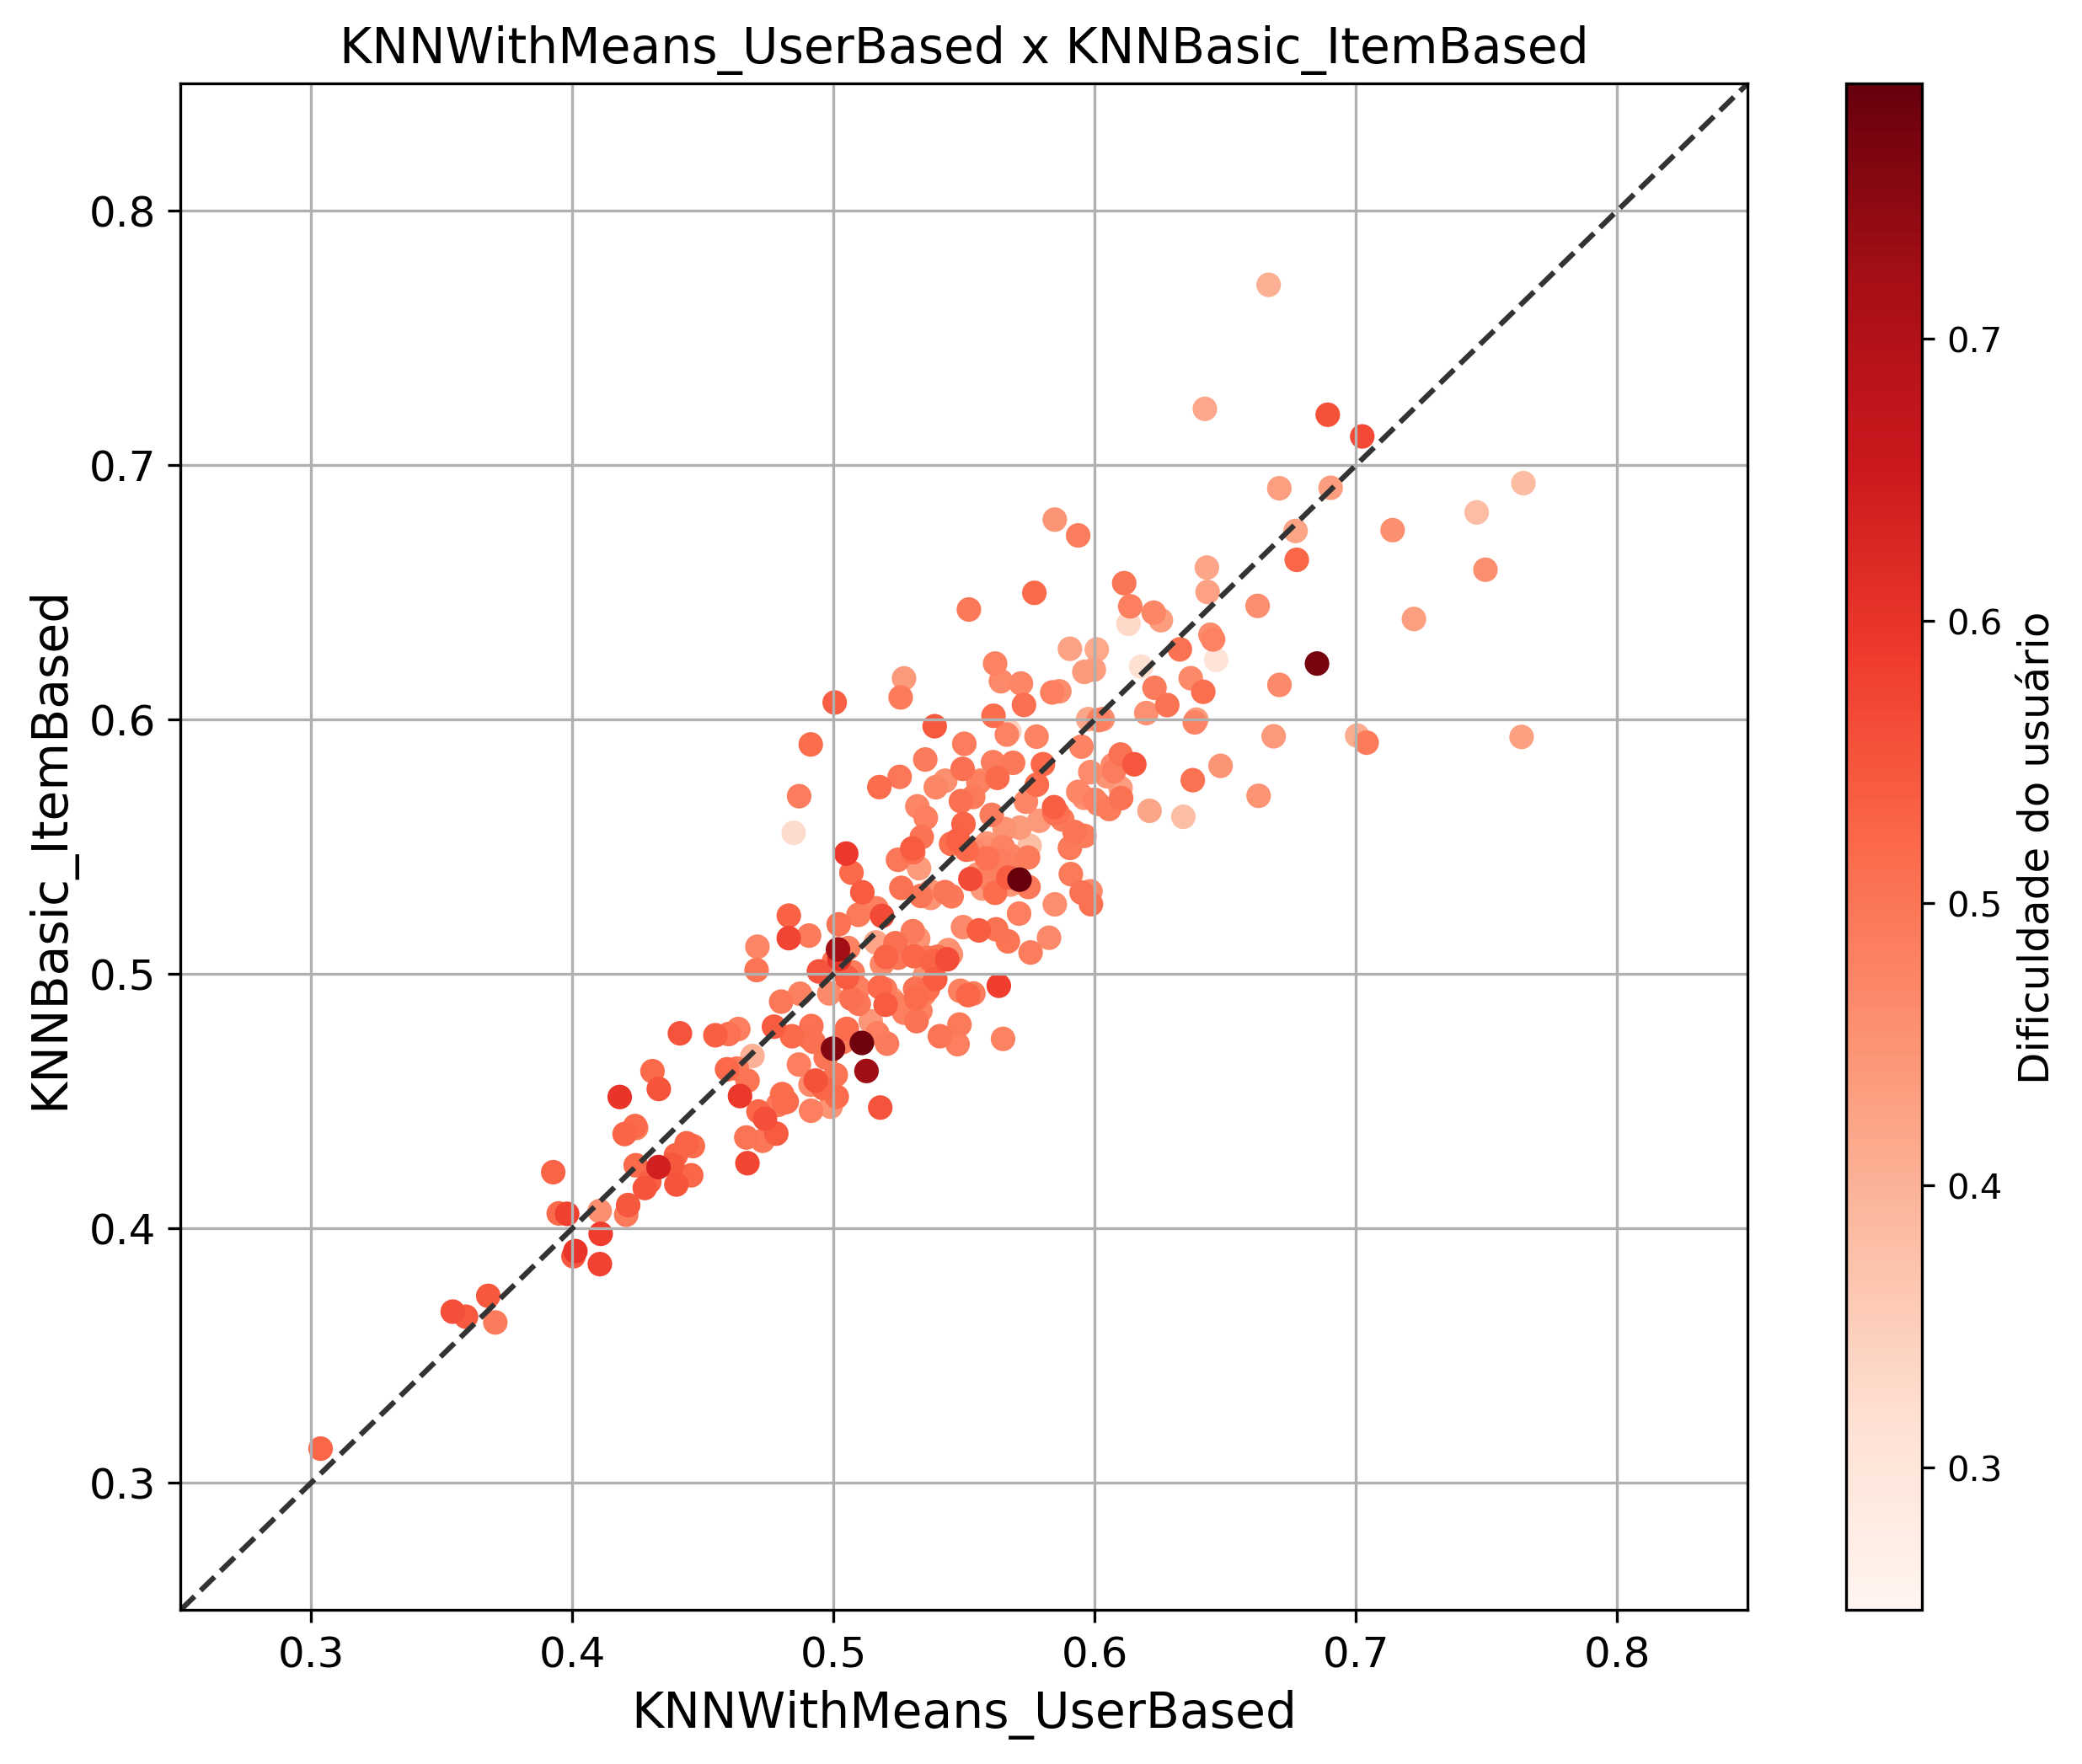

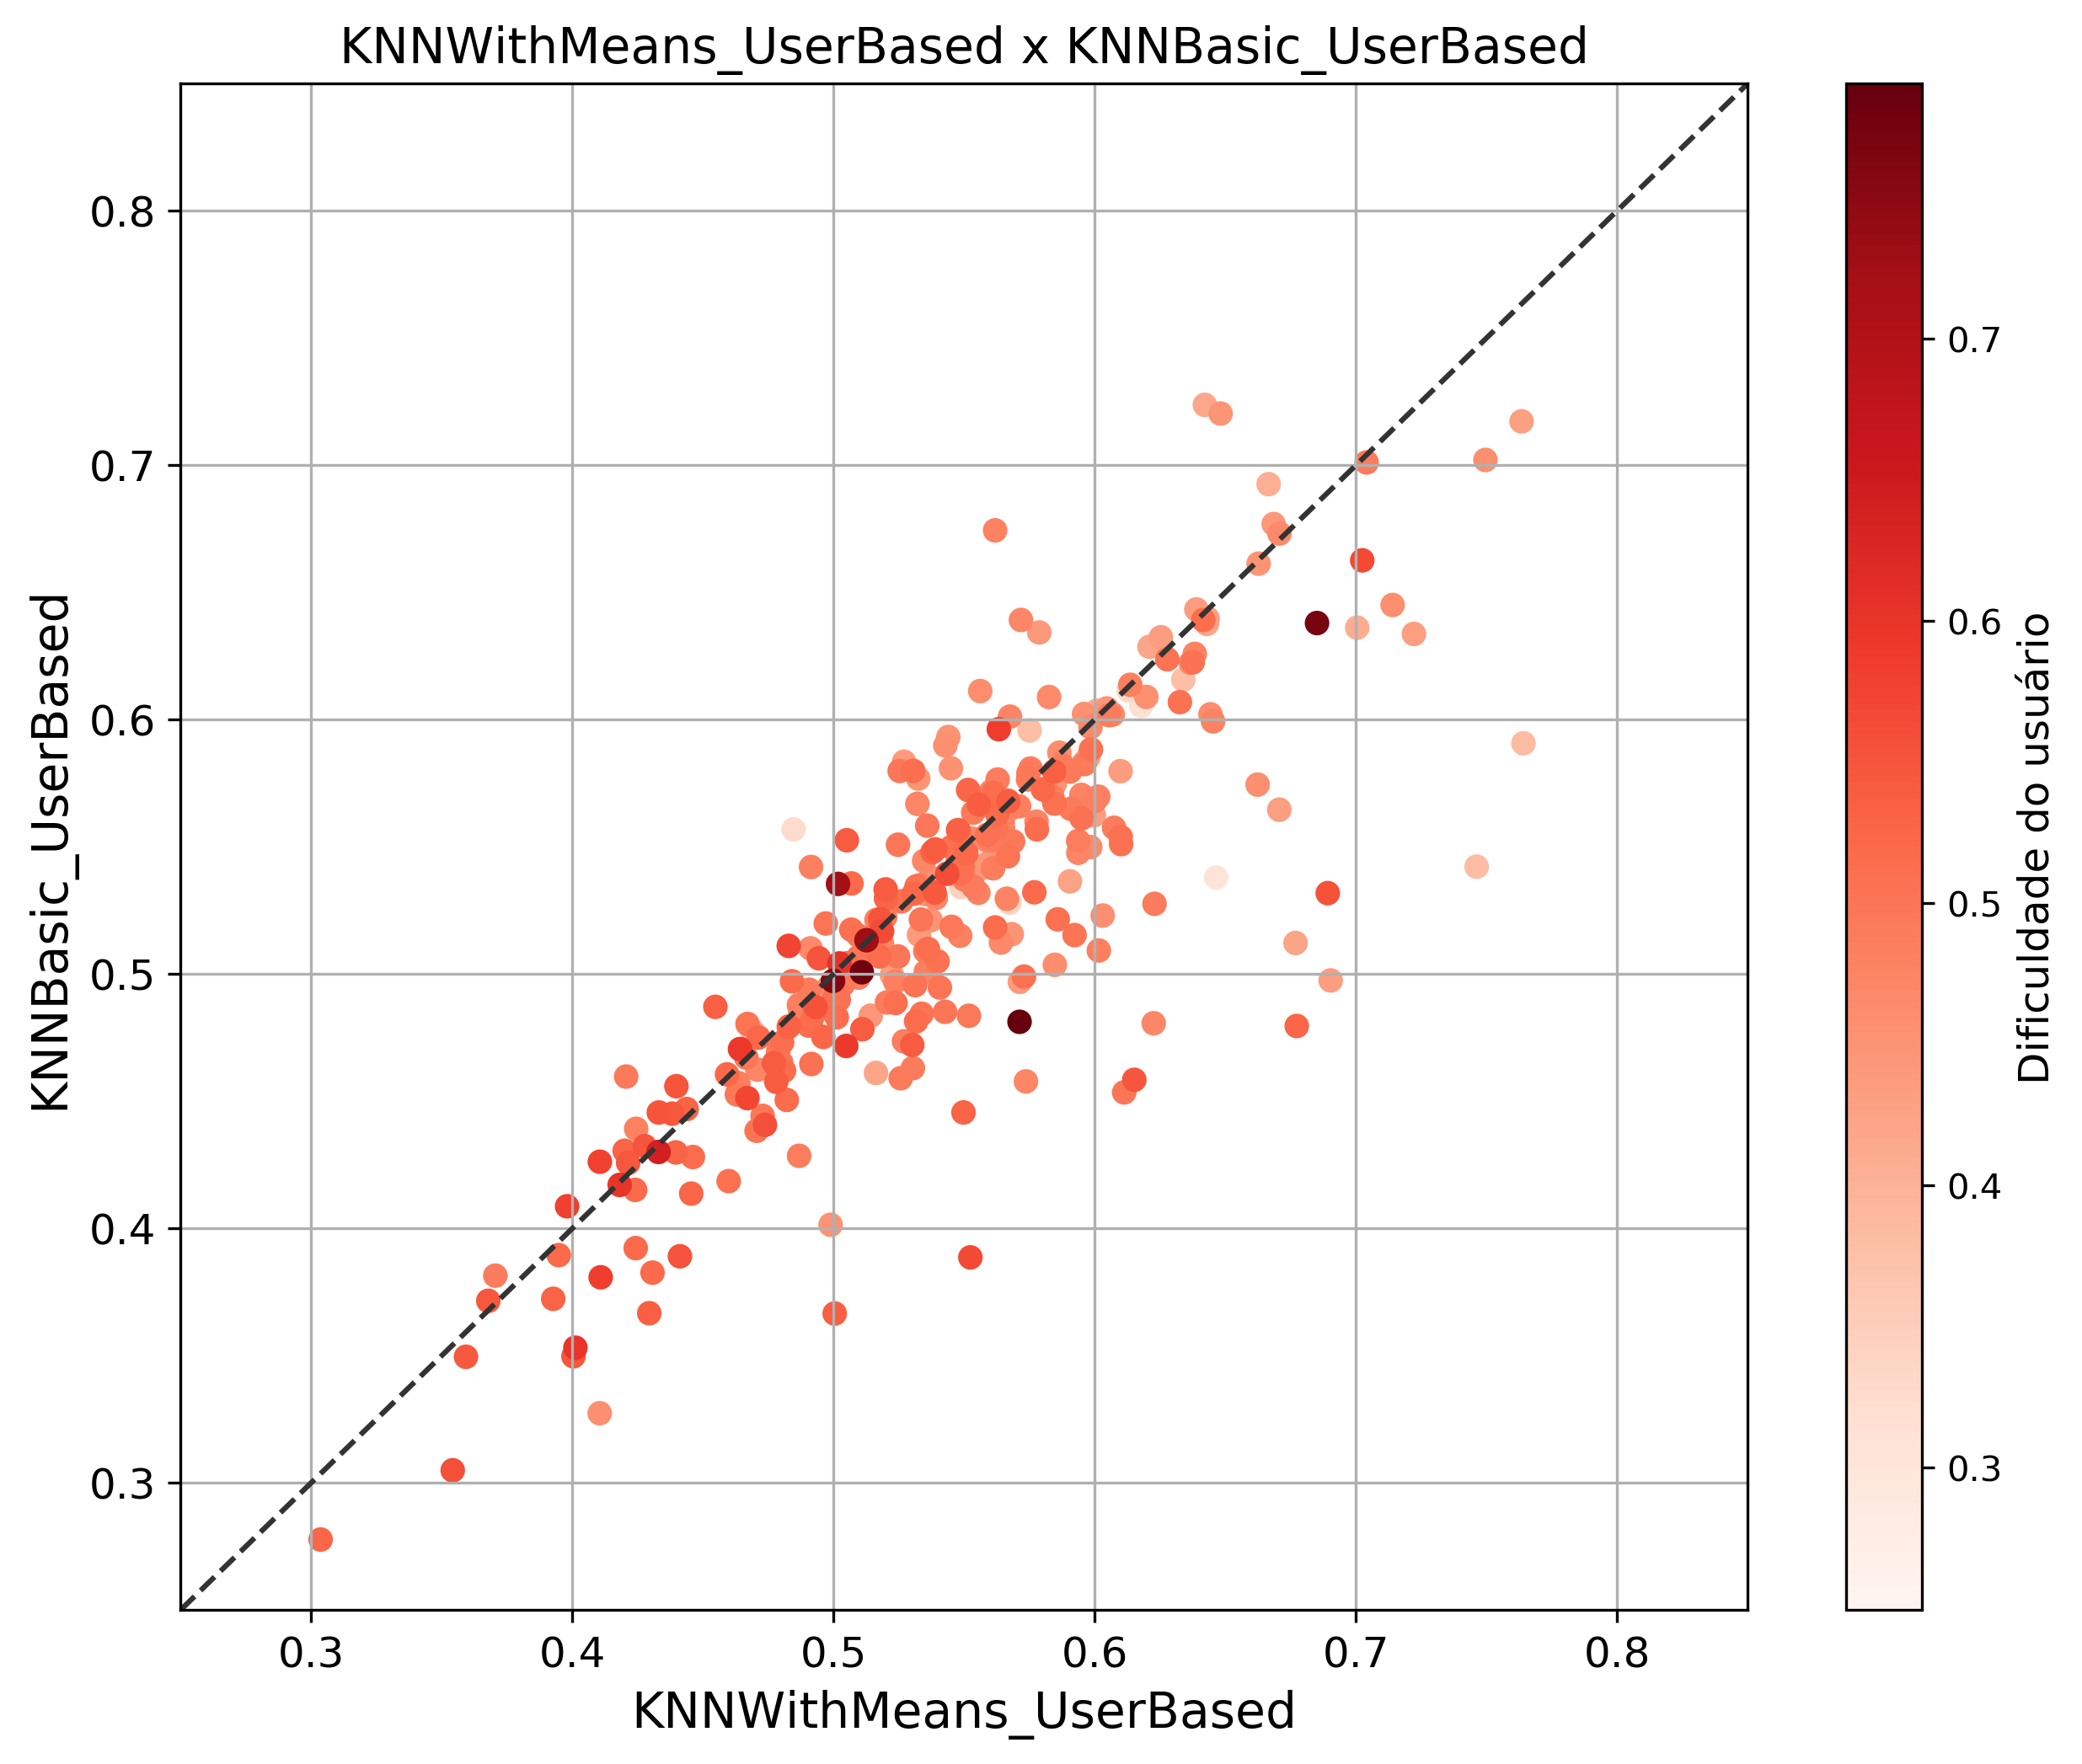

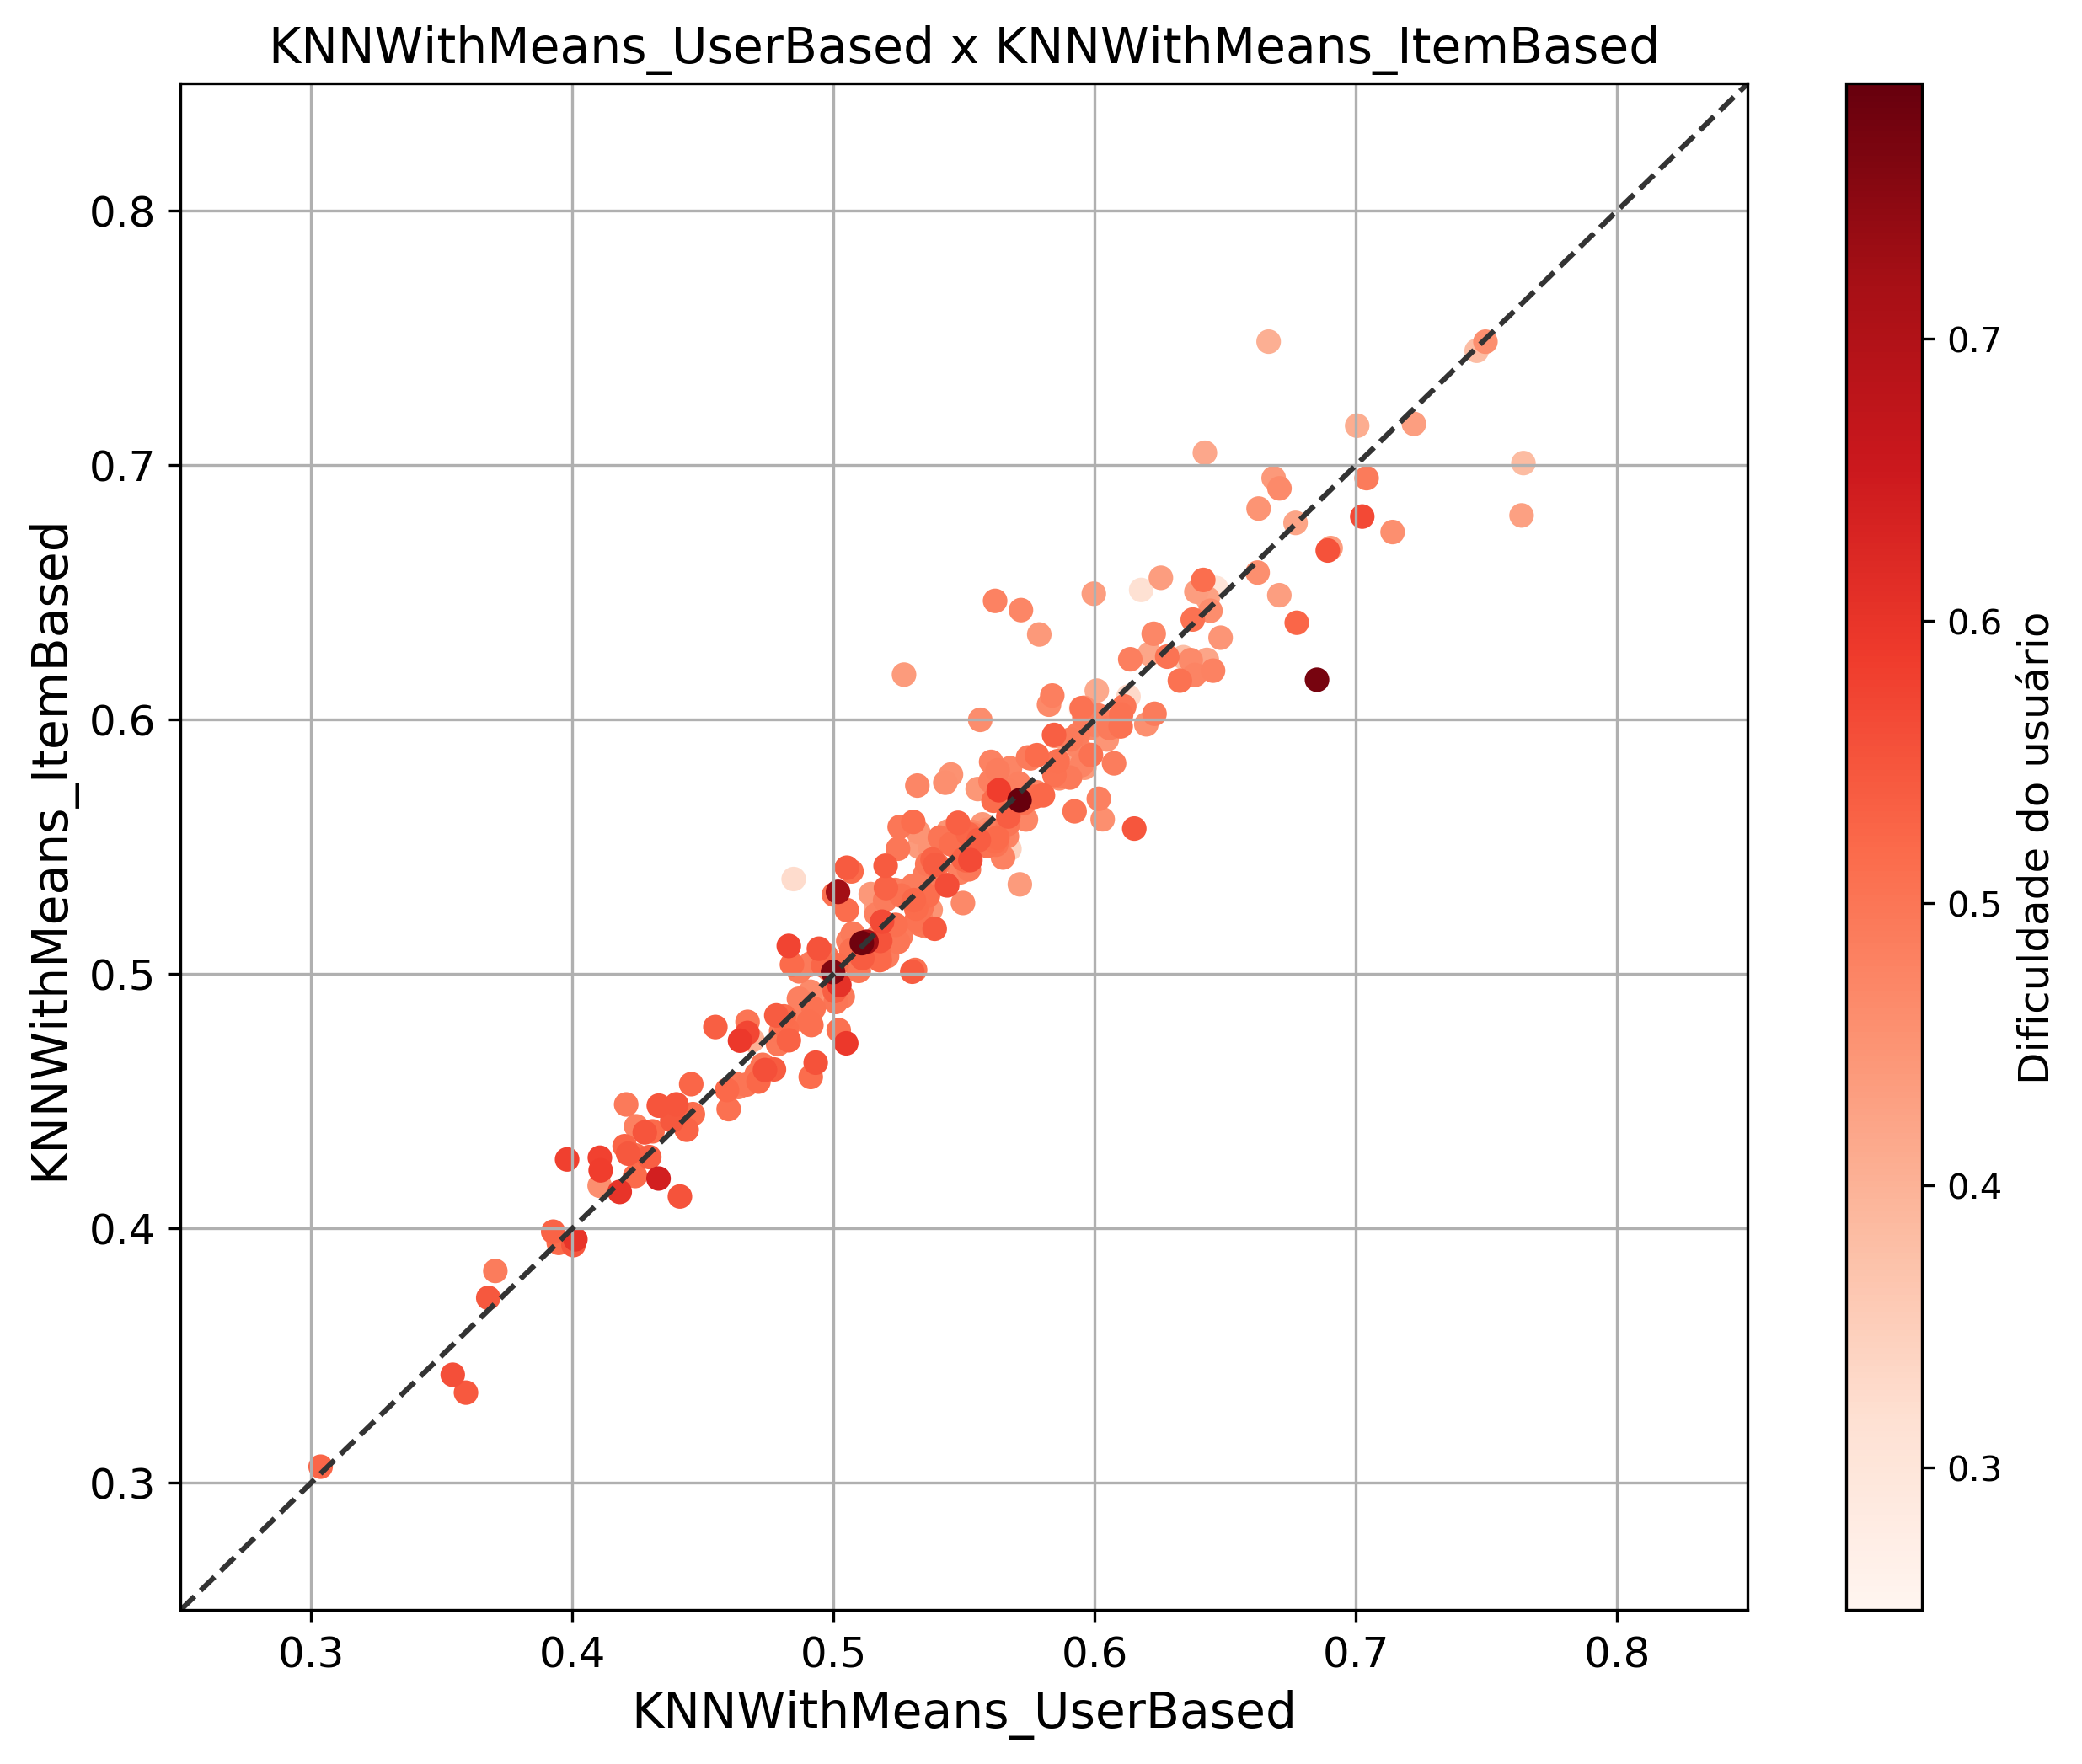

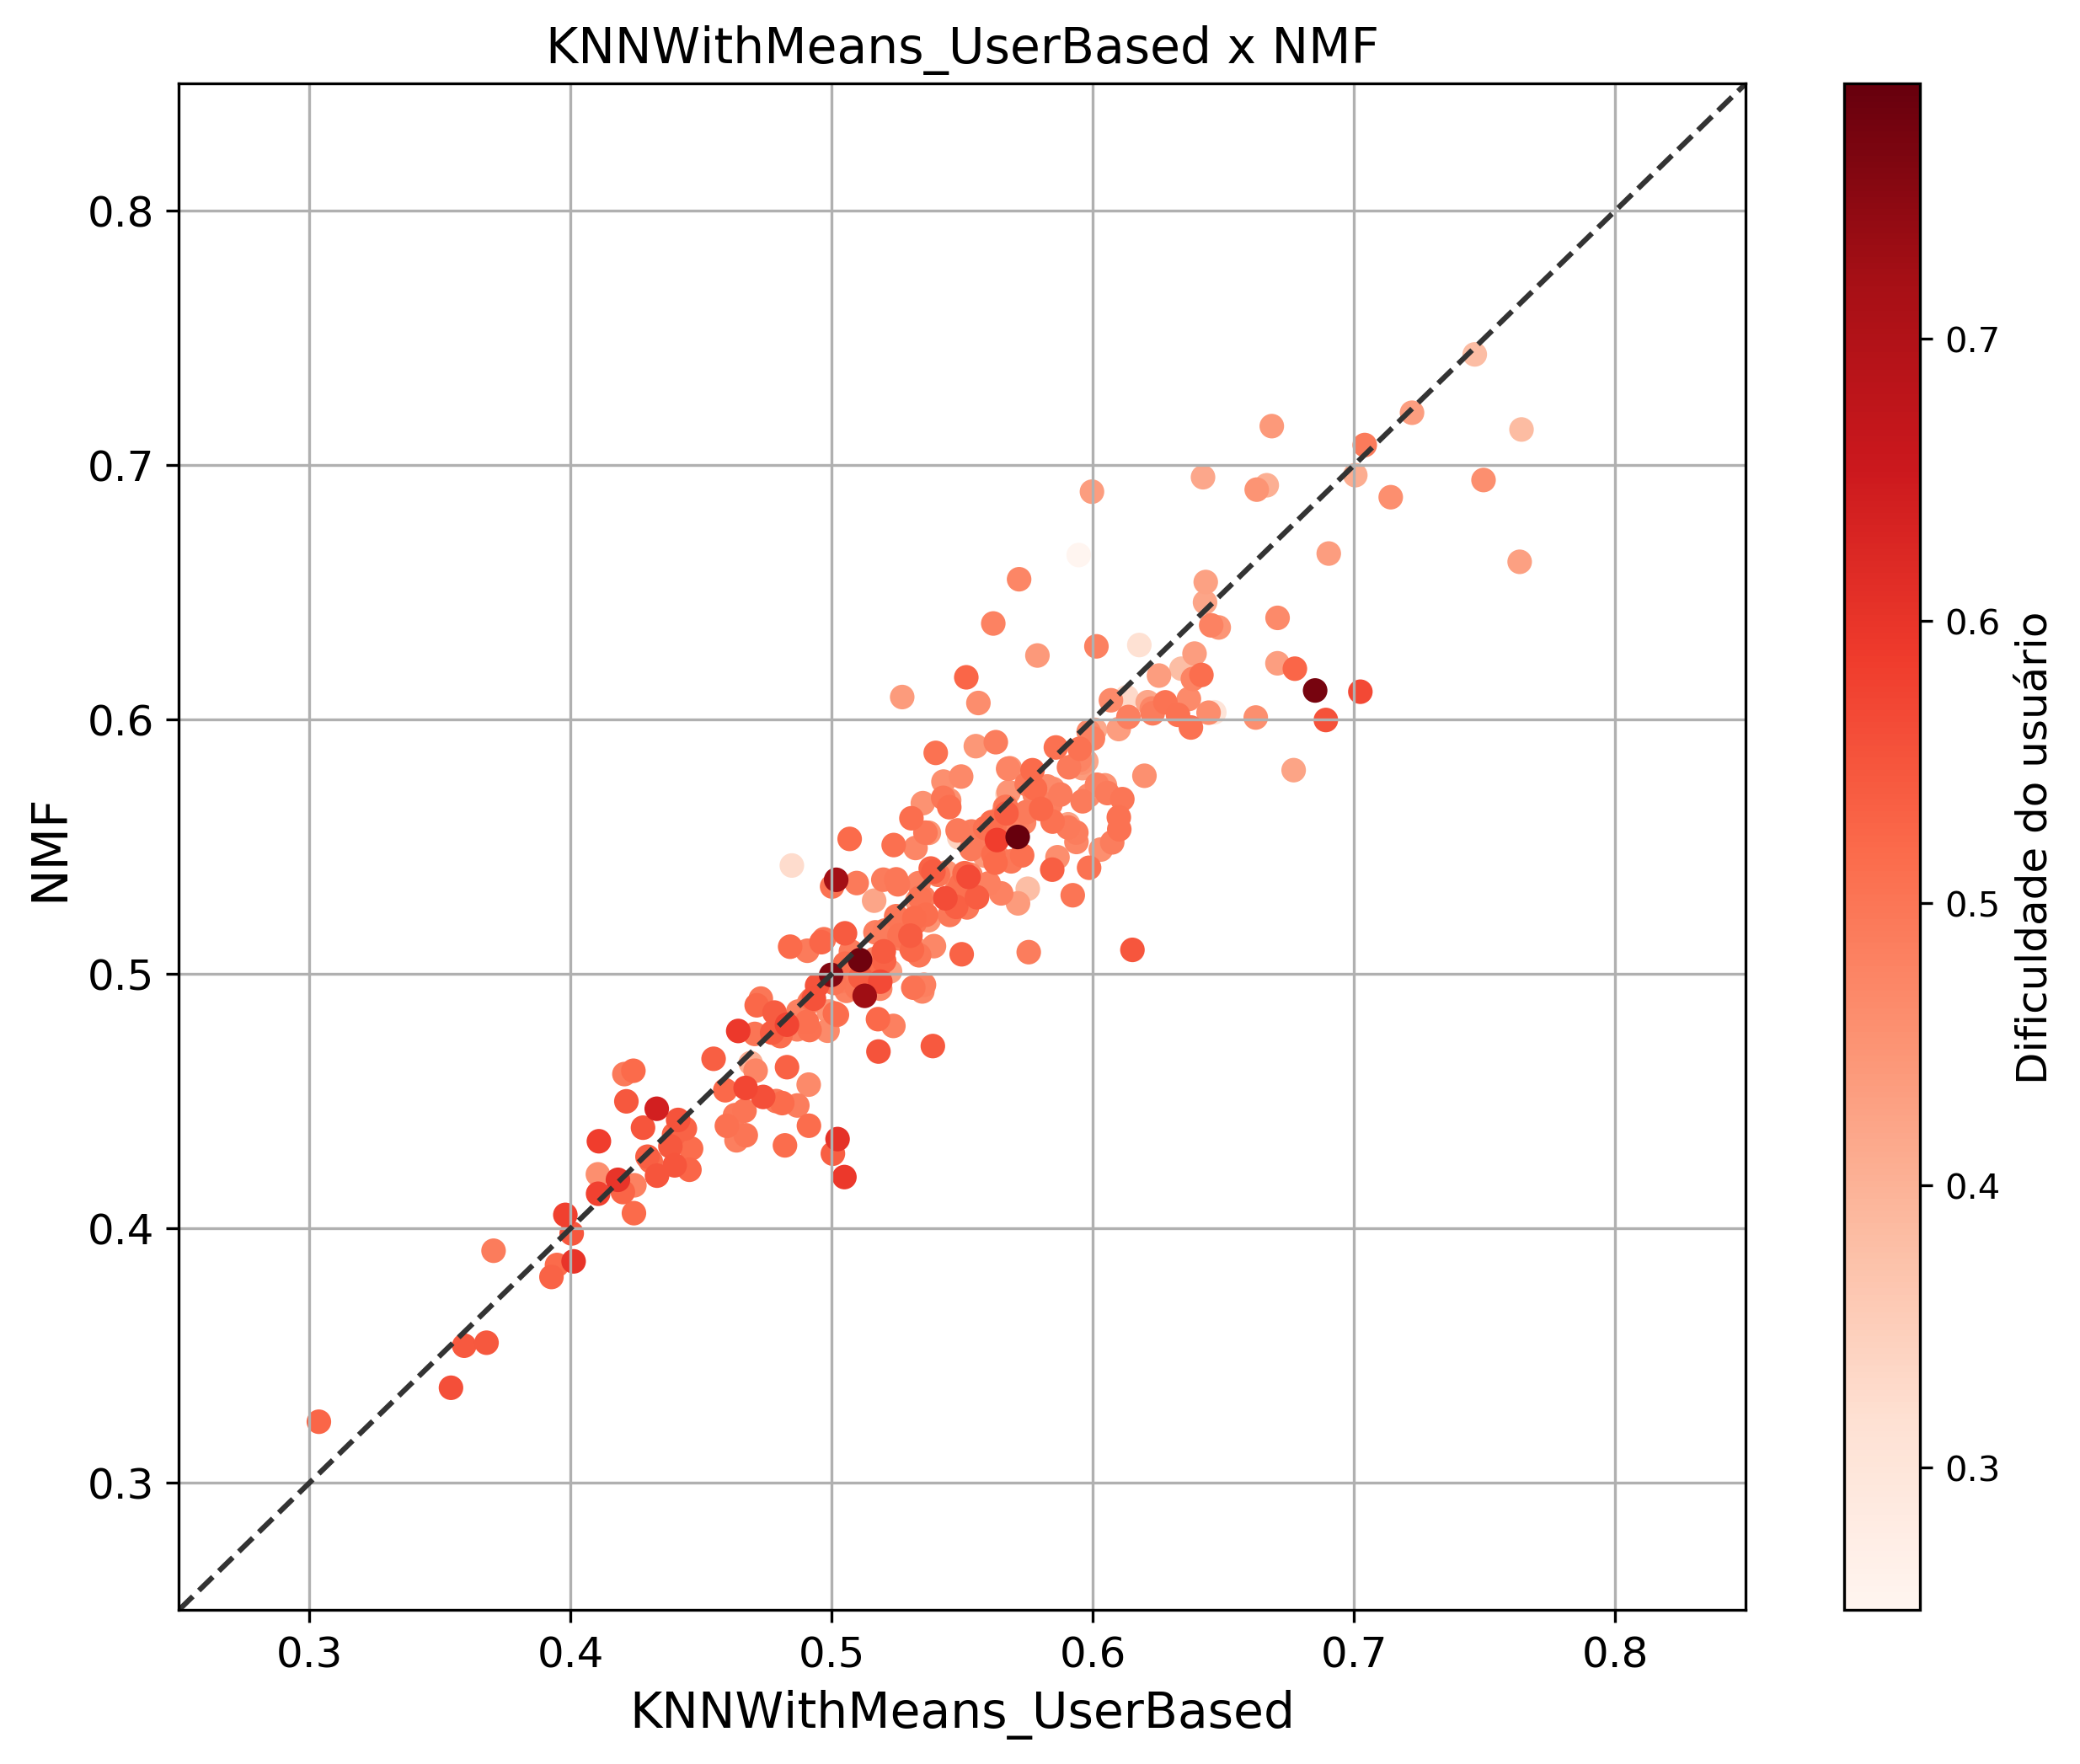

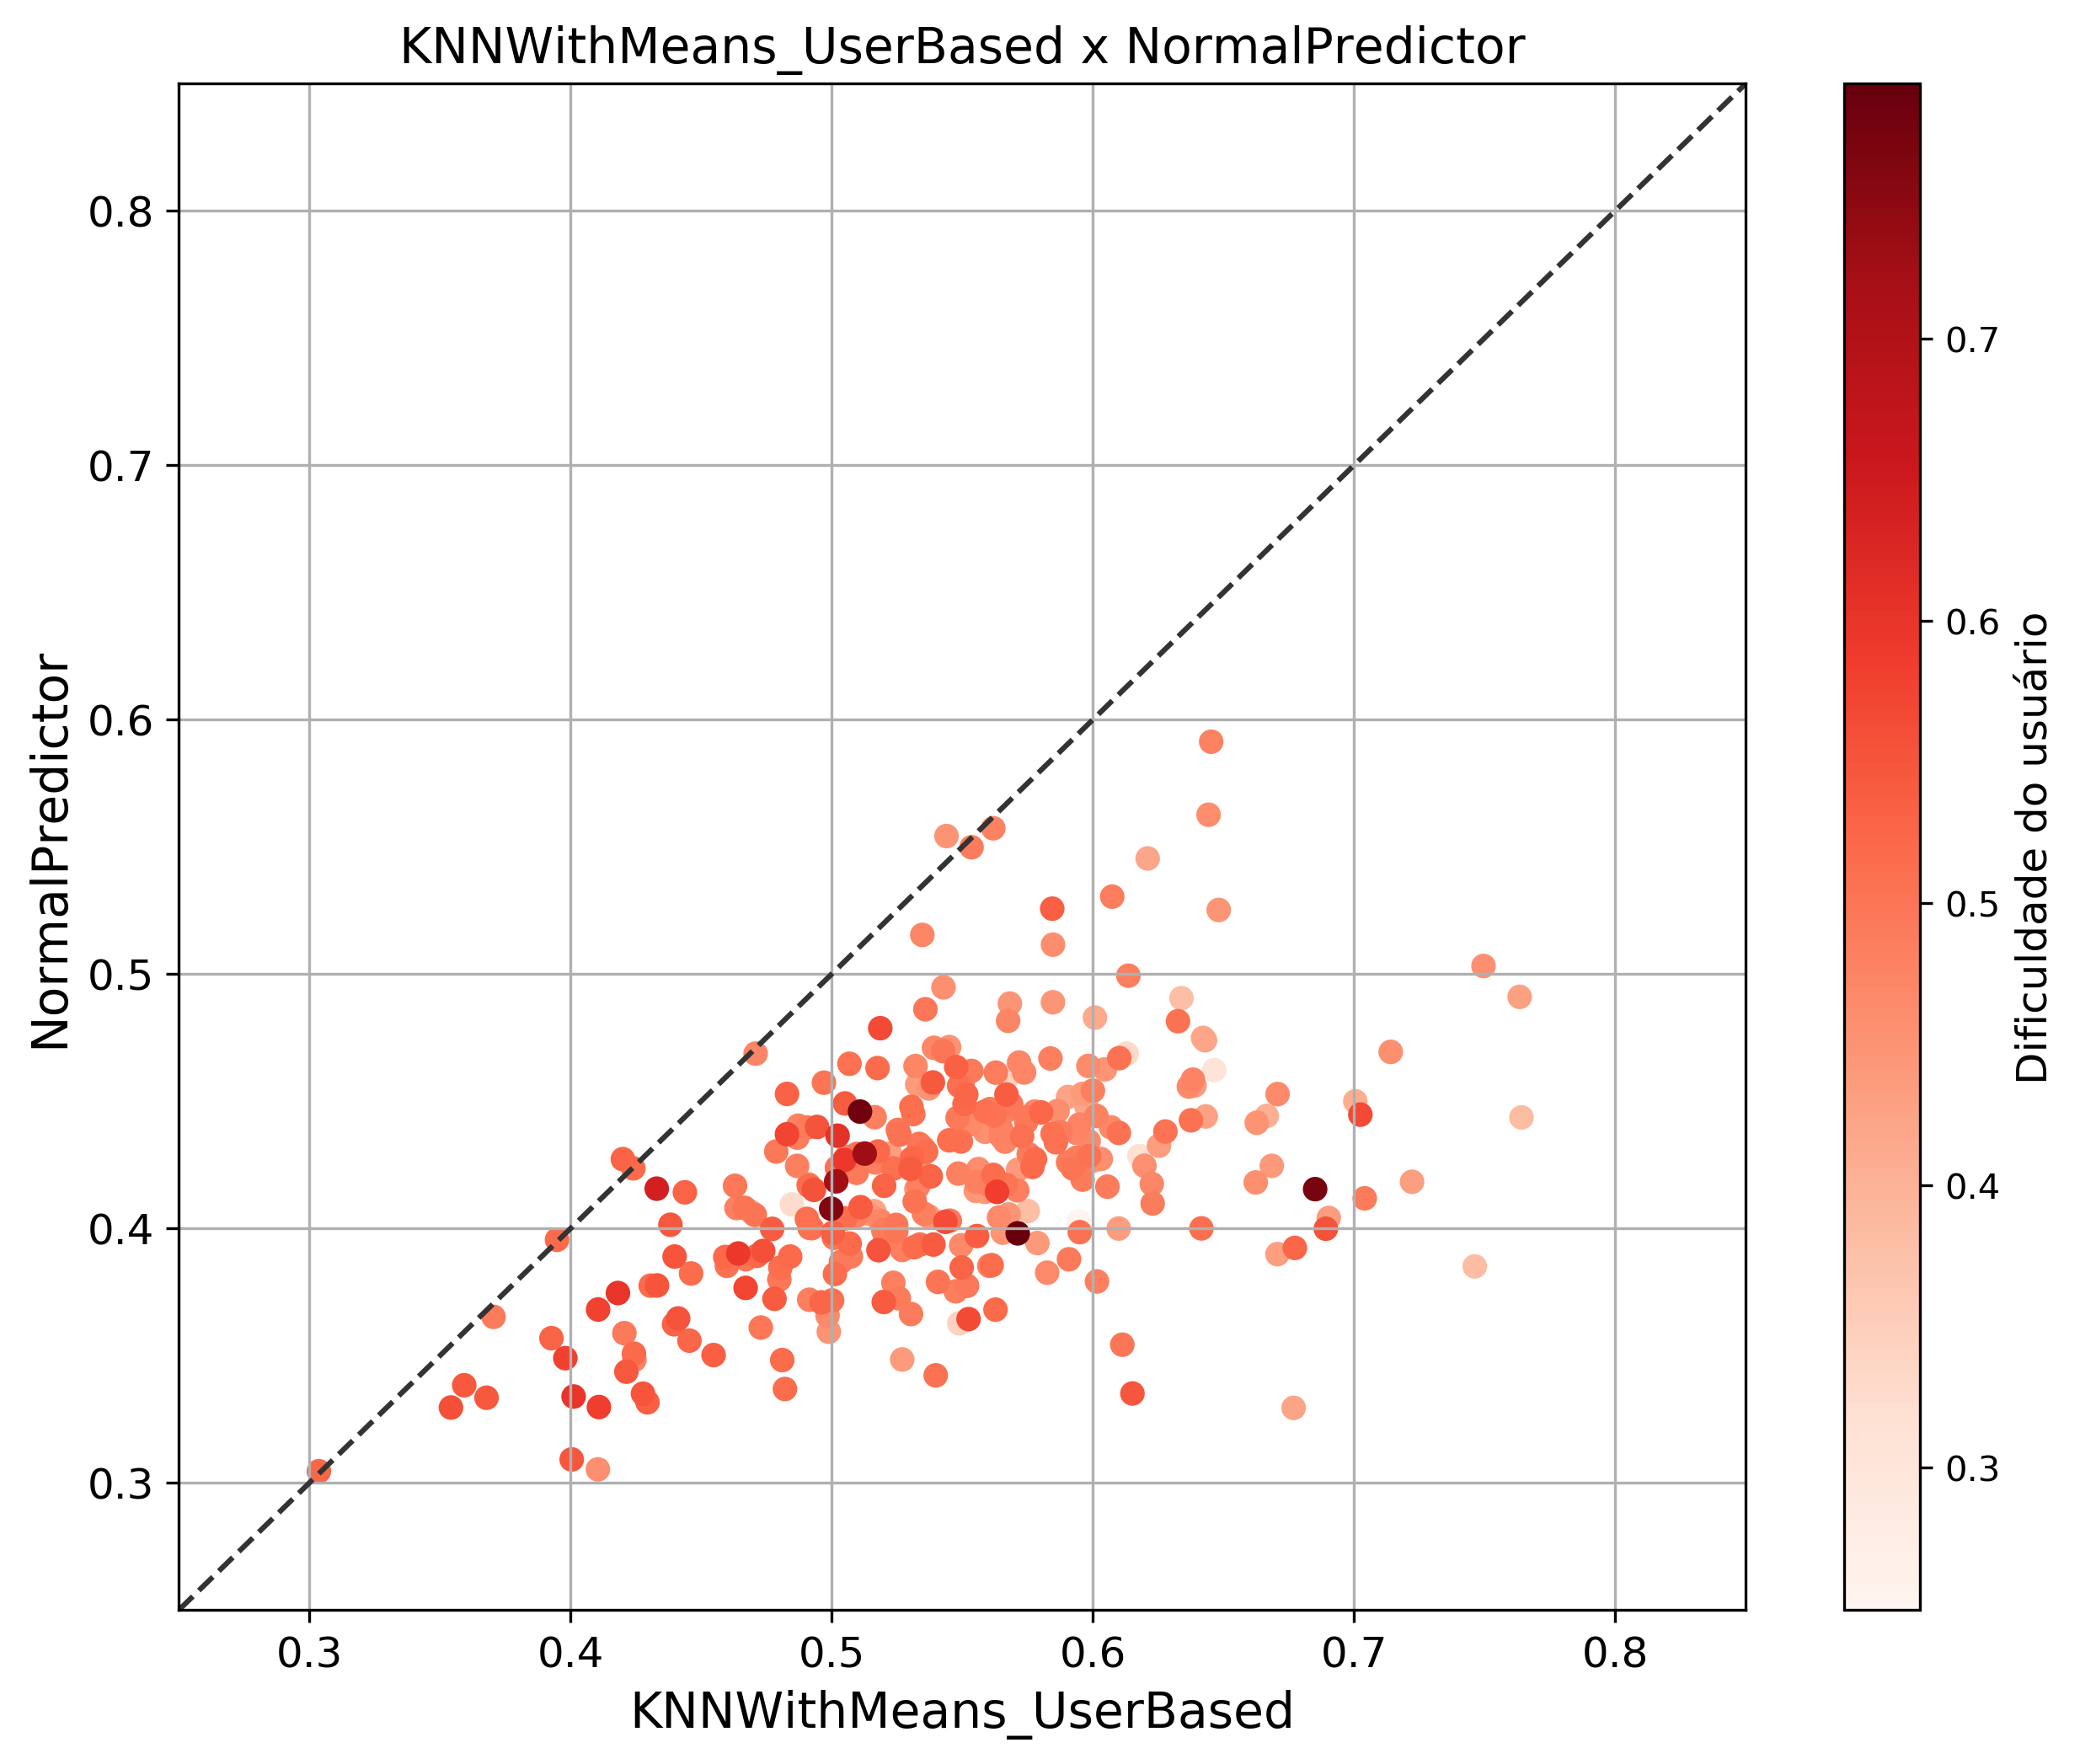

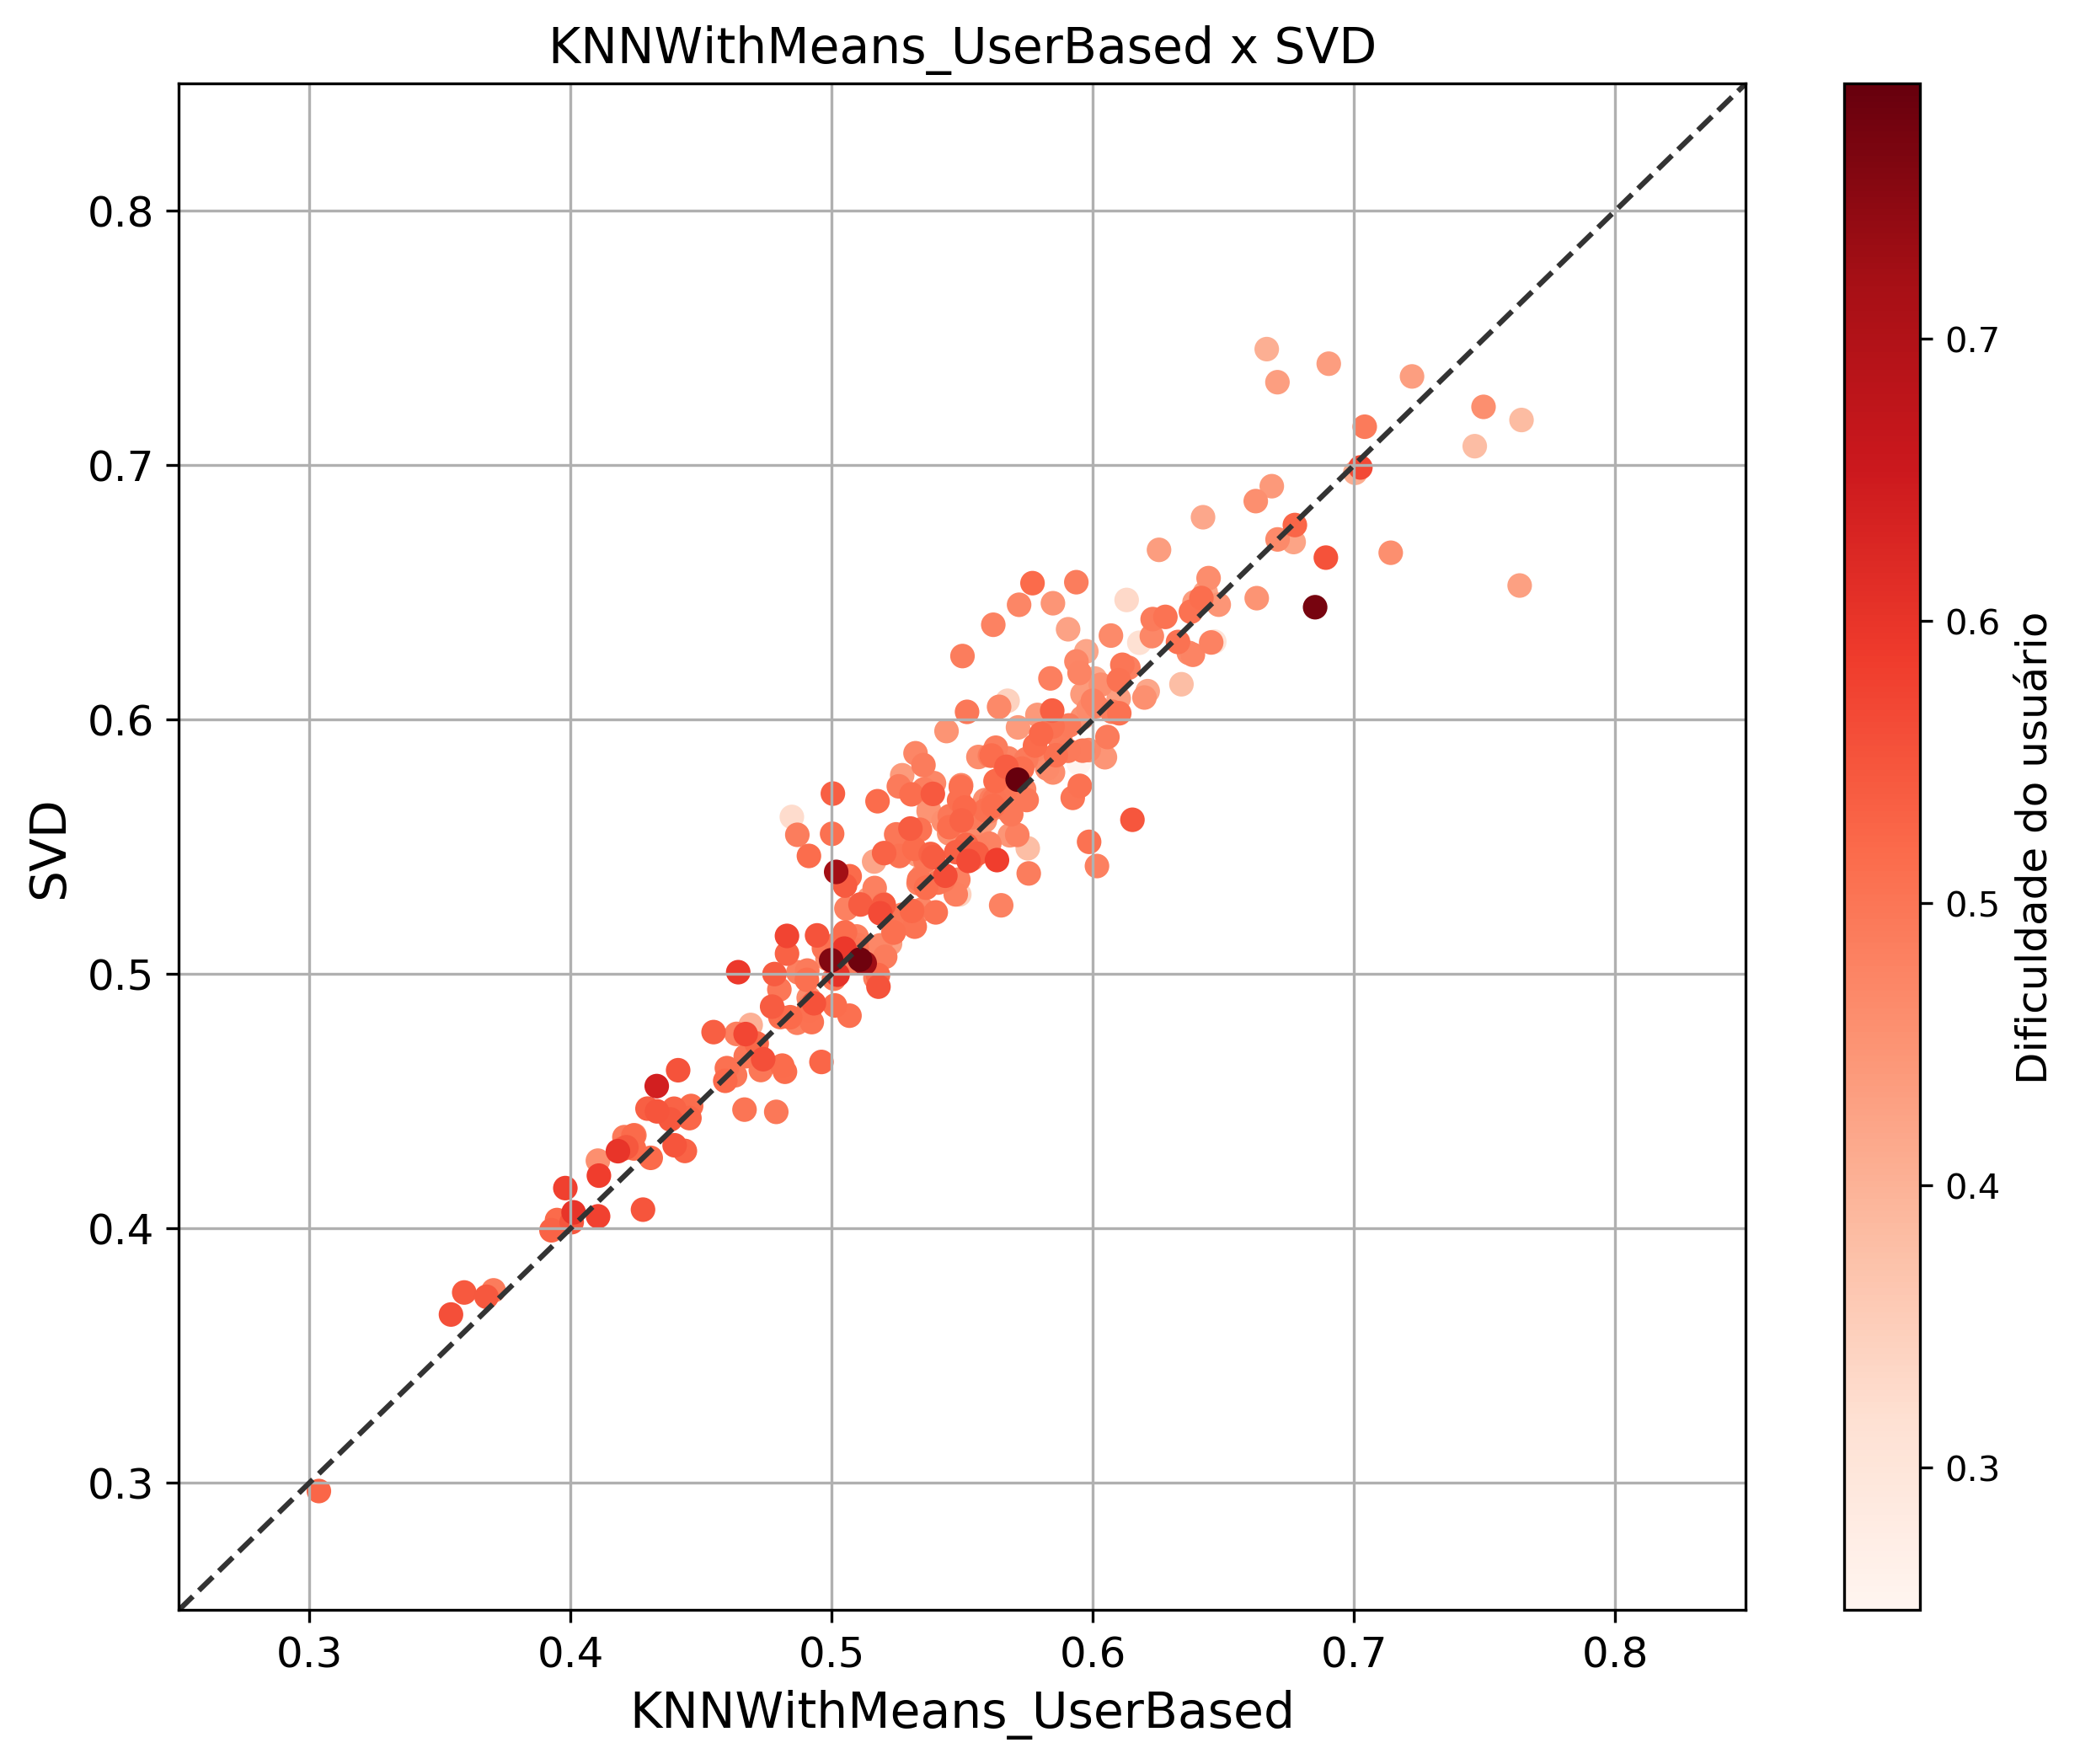

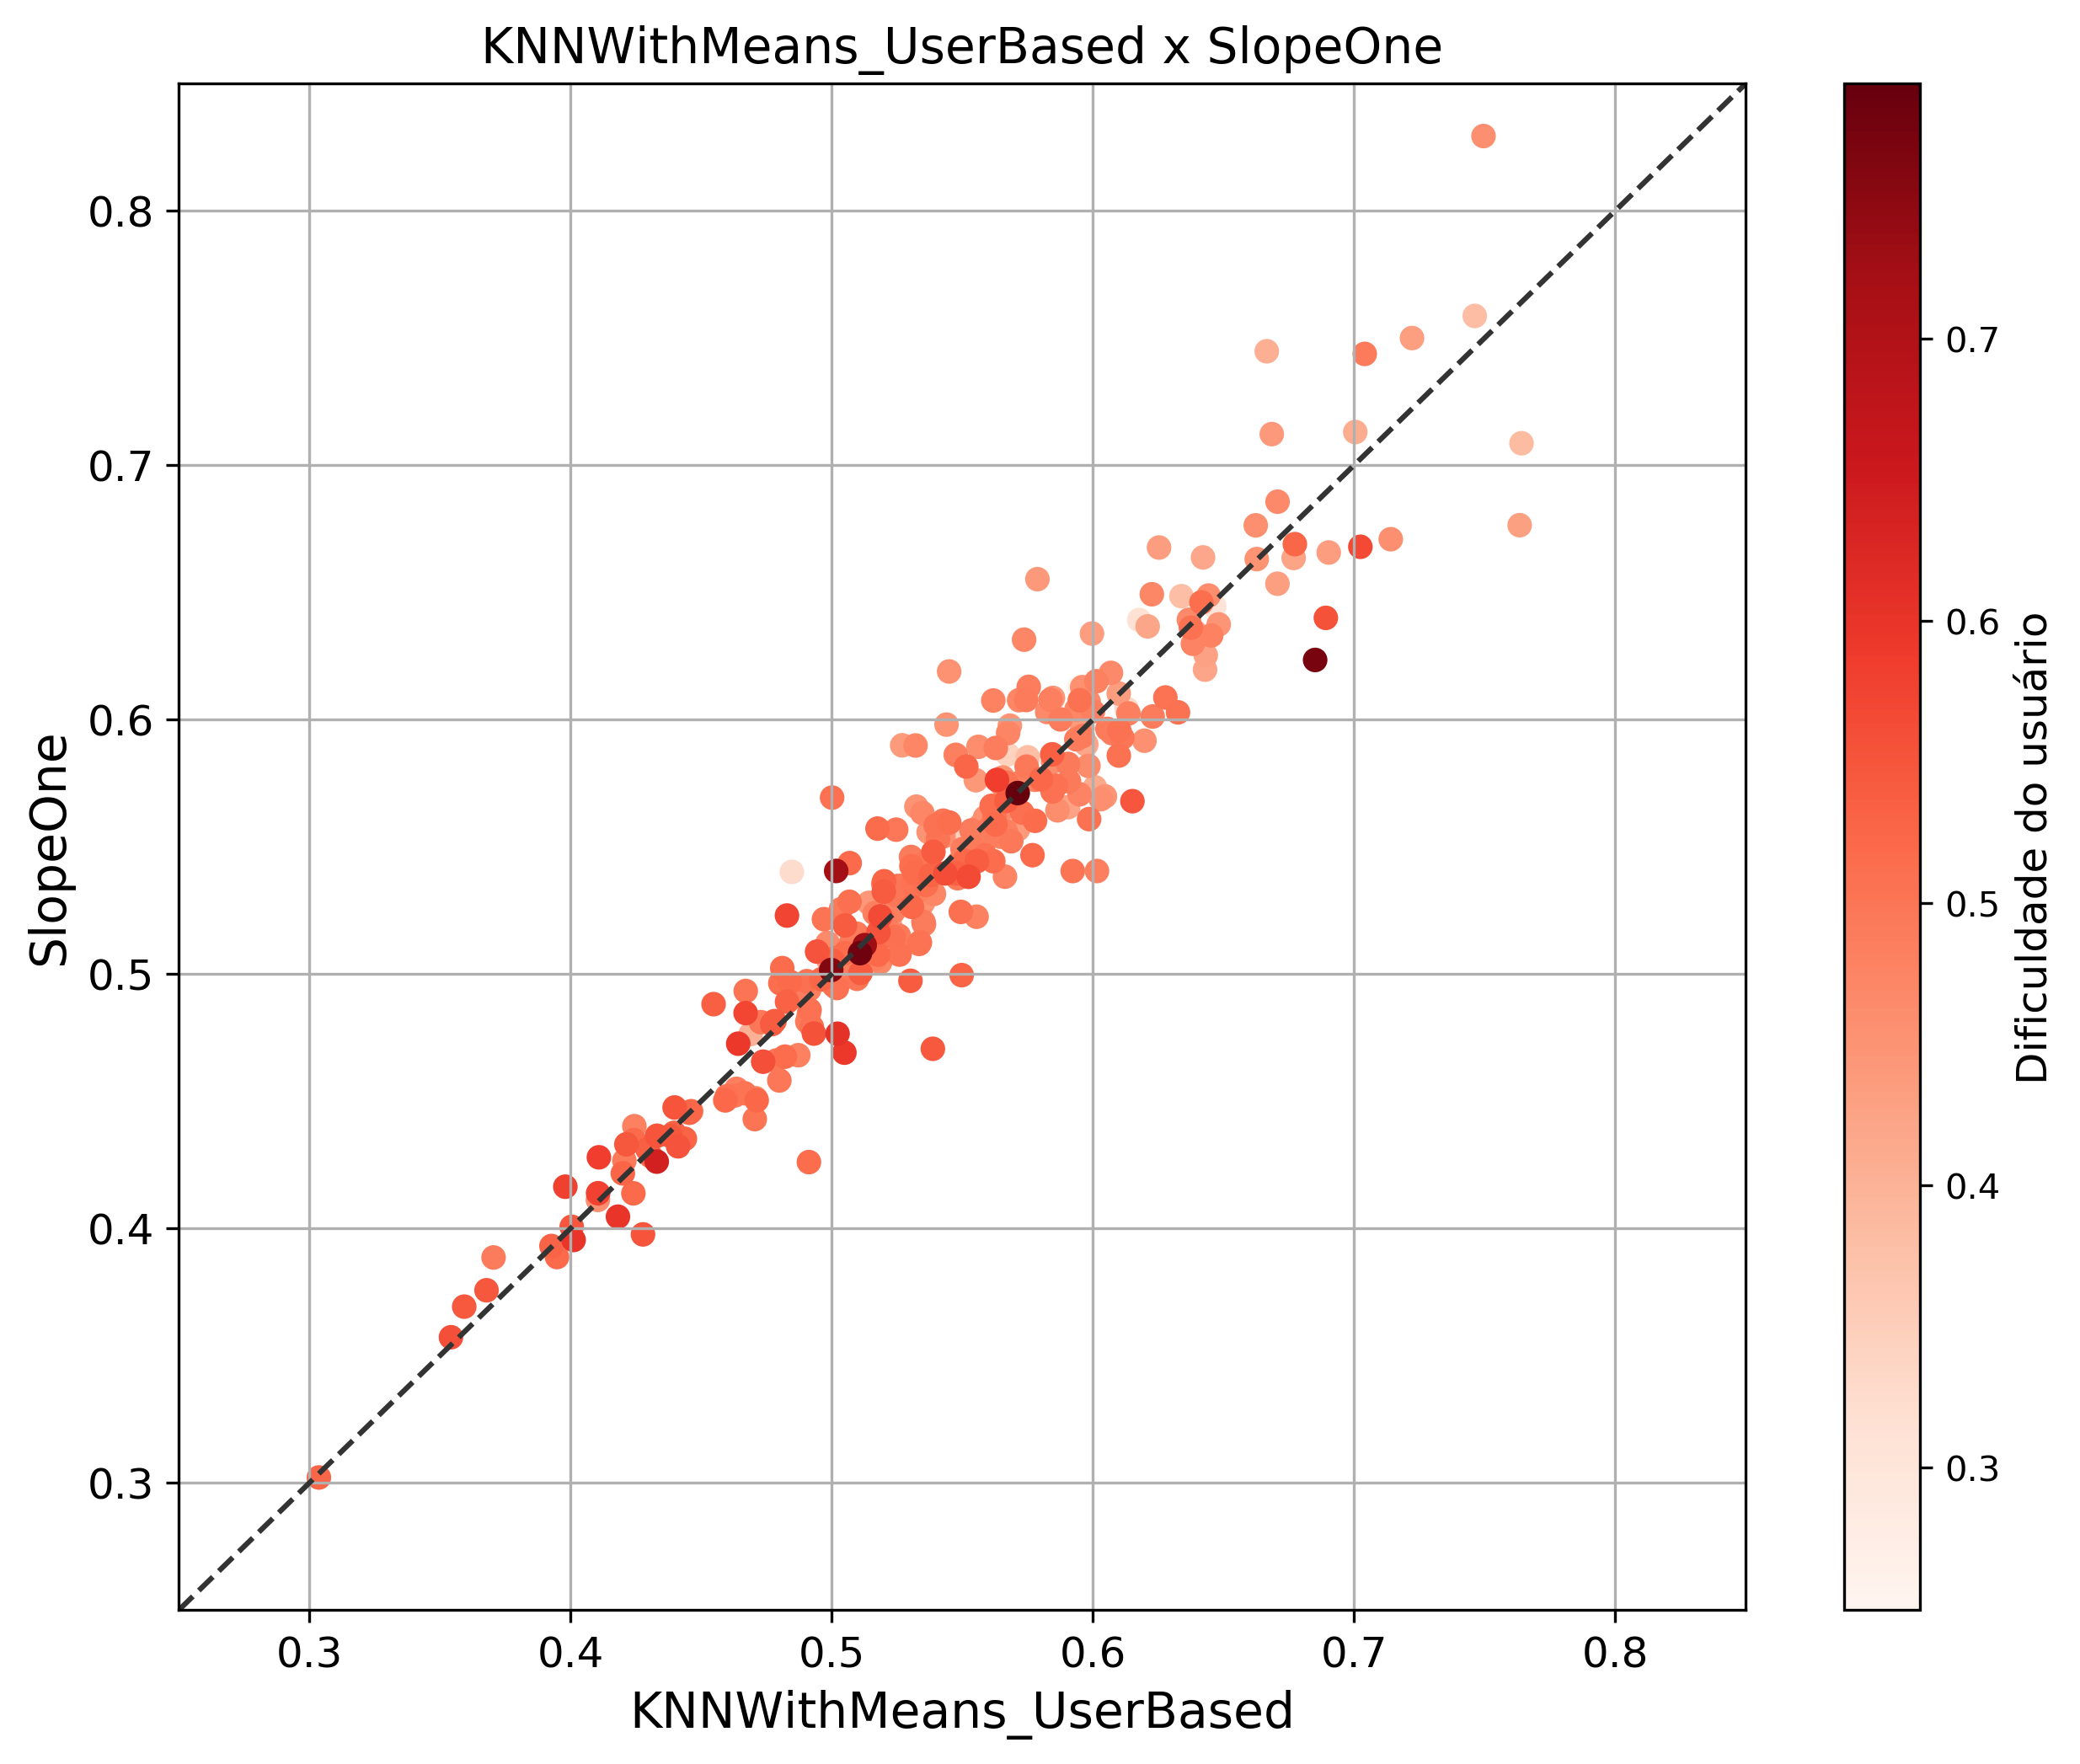

In [29]:
for alg in to_compare.keys():
    plt.figure(figsize = (10, 8), dpi=300)
    
    data = list(zip(baseline, to_compare[alg].values, dif_c, disc_c))
    data.sort(key = lambda x: x[2])
    
    plt.xlim([0.25, 0.85])
    plt.ylim([0.25, 0.85])
    plt.scatter(y=[comp for _, comp, _, _ in data], x=[base for base, _, _, _ in data], c=[dif for _, _, dif, _ in data], cmap='Reds', zorder=1)
    plt.xlabel('KNNWithMeans_UserBased', fontsize=14)
    plt.ylabel(alg, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('KNNWithMeans_UserBased x {}'.format(alg), fontsize=14)
    plt.grid()
    cbar = plt.colorbar()
    cbar.set_label("Dificuldade do usuário", size=12)
    plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".2")
    plt.savefig('./{}_higher.png'.format(alg))
    plt.show()

In [6]:
##### ABILITIES #####
abilities_file = "./Results/BIRT/300 users/irt_ability_vi_recommendation_s300_f20_sd1_am1@0_as1@0.csv"
abilities = pd.read_csv(abilities_file)
abilities = abilities.values[:-1] #stddev line
abilities_v = [value for _, value in abilities]
abilities_n = [name for name, _ in abilities]

In [7]:
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
# colors = ['#66c2a5','#fc8d62','#8da0cb']

In [13]:
abilities_n

['BaselineOnly',
 'CoClustering',
 'KNNBasic_ItemBased',
 'KNNBasic_UserBased',
 'KNNWithMeans_ItemBased',
 'KNNWithMeans_UserBased',
 'NMF',
 'NormalPredictor',
 'SVD',
 'SlopeOne']

In [44]:
dif_params

[('302',
  0.24964014,
  array([0.59811964, 0.55923595, 0.53436677, 0.58674452, 0.60433312,
         0.59456493, 0.66466755, 0.40292028, 0.58281602, 0.61238116])),
 ('435',
  0.3057419,
  array([0.65104972, 0.66308409, 0.62342909, 0.53787548, 0.65171616,
         0.6464604 , 0.60286446, 0.46222139, 0.63064503, 0.64455165])),
 ('290',
  0.31693709999999997,
  array([0.63272103, 0.59227534, 0.62081888, 0.60542216, 0.65094906,
         0.61776058, 0.62929585, 0.42842926, 0.63018703, 0.63912766])),
 ('300',
  0.3242717,
  array([0.53836511, 0.47173114, 0.55546762, 0.55685446, 0.53731388,
         0.48471545, 0.54263663, 0.4094474 , 0.56172929, 0.54010803])),
 ('346',
  0.33151907,
  array([0.63157509, 0.60691557, 0.63763589, 0.61144735, 0.60908243,
         0.61290693, 0.60880199, 0.46867054, 0.64701264, 0.60419968])),
 ('315',
  0.34265712,
  array([0.60399727, 0.53532002, 0.59531878, 0.52805227, 0.54914504,
         0.56732   , 0.57064198, 0.45965839, 0.60738745, 0.58632025])),
 ('359',


In [30]:
lines = []
lines2 = []
for i, x in enumerate(abilities_n):
    lines.append((x, [(dif, arr[i]) for _, dif, arr in dif_params]))
    lines2.append((x, [(disc, arr[i]) for _, disc, arr in disc_params]))

In [31]:
filt_in = [
 'NormalPredictor']

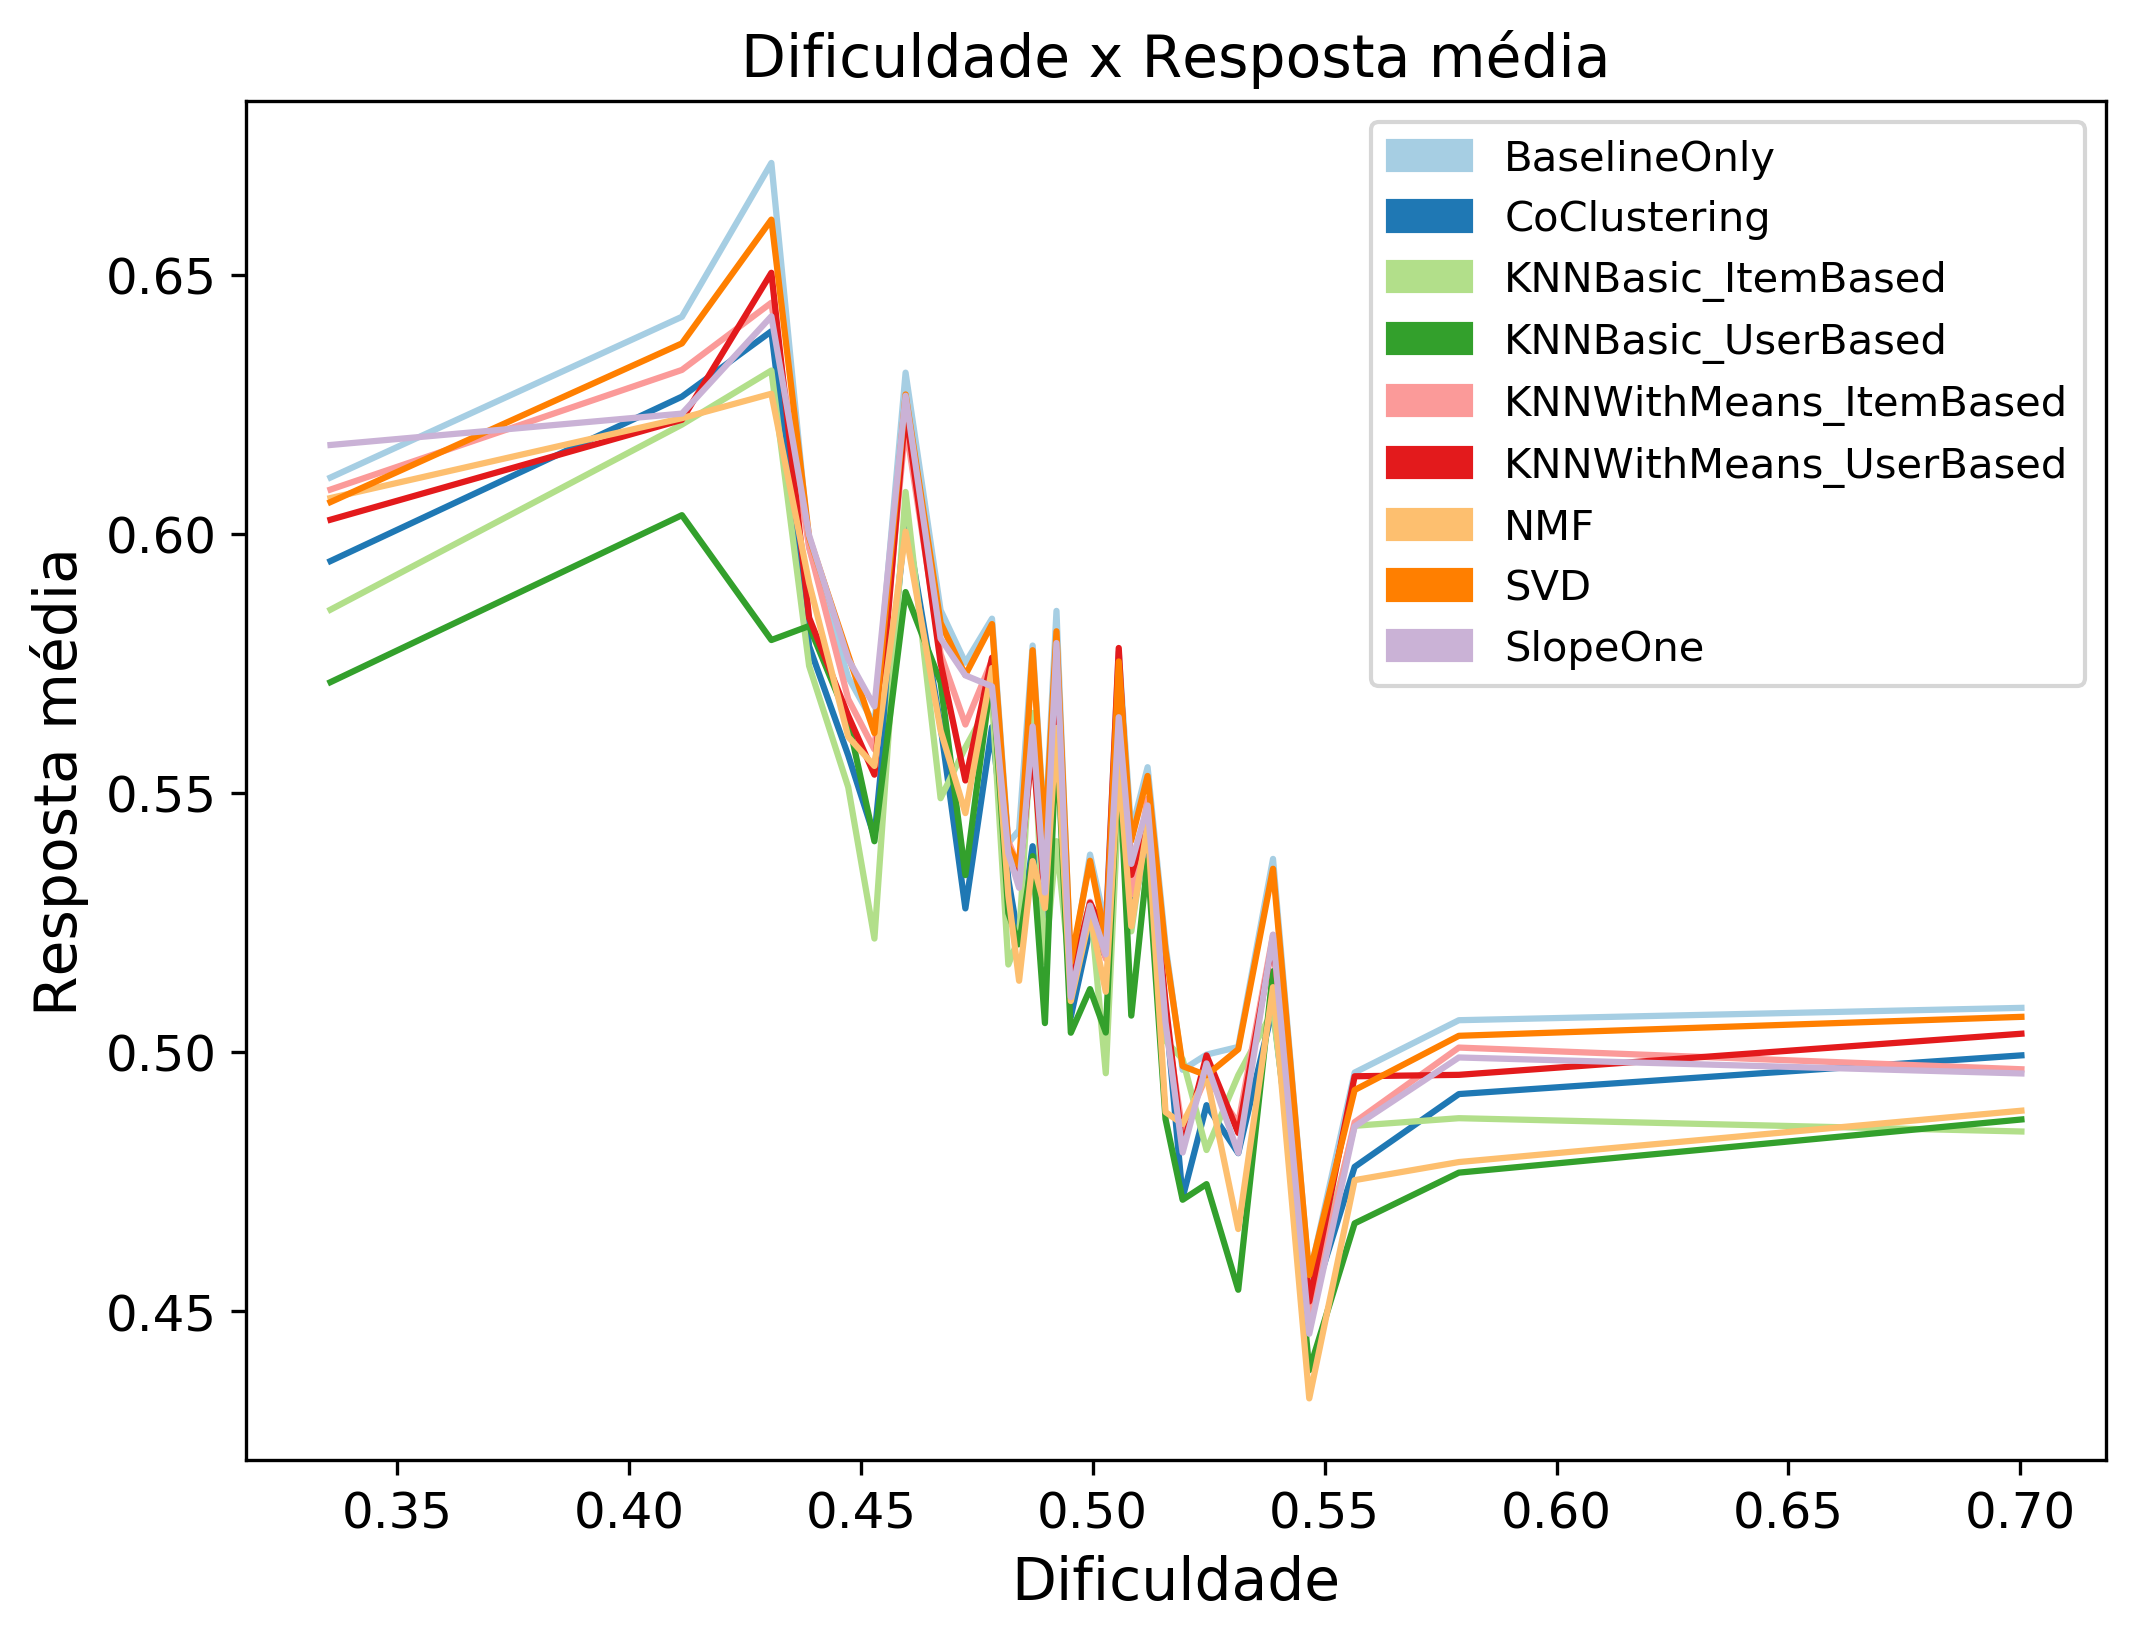

In [34]:
from statistics import mean

plt.figure(figsize = (8,6), dpi=300)
patches = []
n = 10
for x, (name, resps) in enumerate(list(filter(lambda x: x[0] not in filt_in, lines))):
    xaxis = []
    yaxis = []
    for i in range(0, len(resps), n):
        xaxis.append(mean([dif for dif, _ in resps[i:i+n]]))
        yaxis.append(mean([resp for _, resp in resps[i:i+n]]))
        
    plt.plot(xaxis, yaxis, c=colors[x])
    patches.append(mpatches.Patch(color=colors[x], label=name))
lgd = plt.legend(handles=patches, bbox_to_anchor=(1, 1))

plt.xlabel('Dificuldade', fontsize=14)
plt.ylabel('Resposta média', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Dificuldade x Resposta média', fontsize=14)

plt.savefig('./difficulty_response_without_normal.png', bbox_inches='tight')

plt.show()

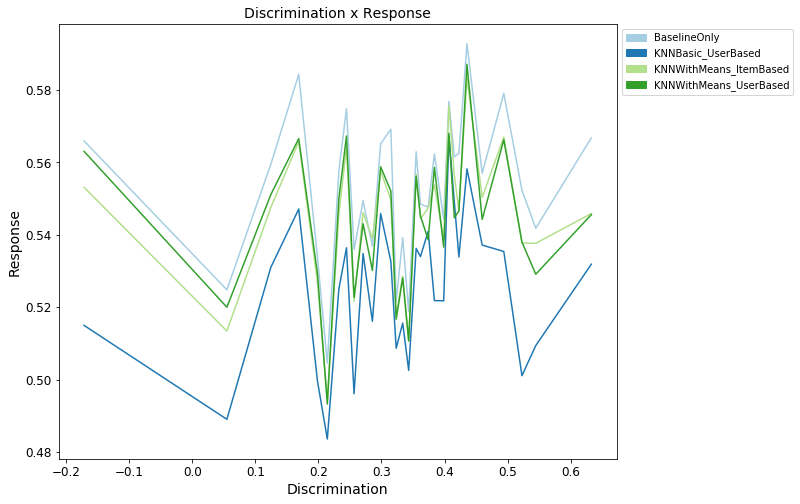

In [99]:
from statistics import mean

plt.figure(figsize = (10,8))
patches = []
for x, (name, resps) in enumerate(list(filter(lambda x: x[0] not in filt_in, lines2))):
    xaxis = []
    yaxis = []
    for i in range(0, len(resps), 10):
        xaxis.append(mean([dif for dif, _ in resps[i:i+10]]))
        yaxis.append(mean([resp for _, resp in resps[i:i+10]]))
        
    plt.plot(xaxis, yaxis, c=colors[x])
    patches.append(mpatches.Patch(color=colors[x], label=name))
lgd = plt.legend(handles=patches, bbox_to_anchor=(1, 1))

plt.xlabel('Discrimination', fontsize=14)
plt.ylabel('Response', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Discrimination x Response', fontsize=14)

plt.show()

c:\users\barre\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


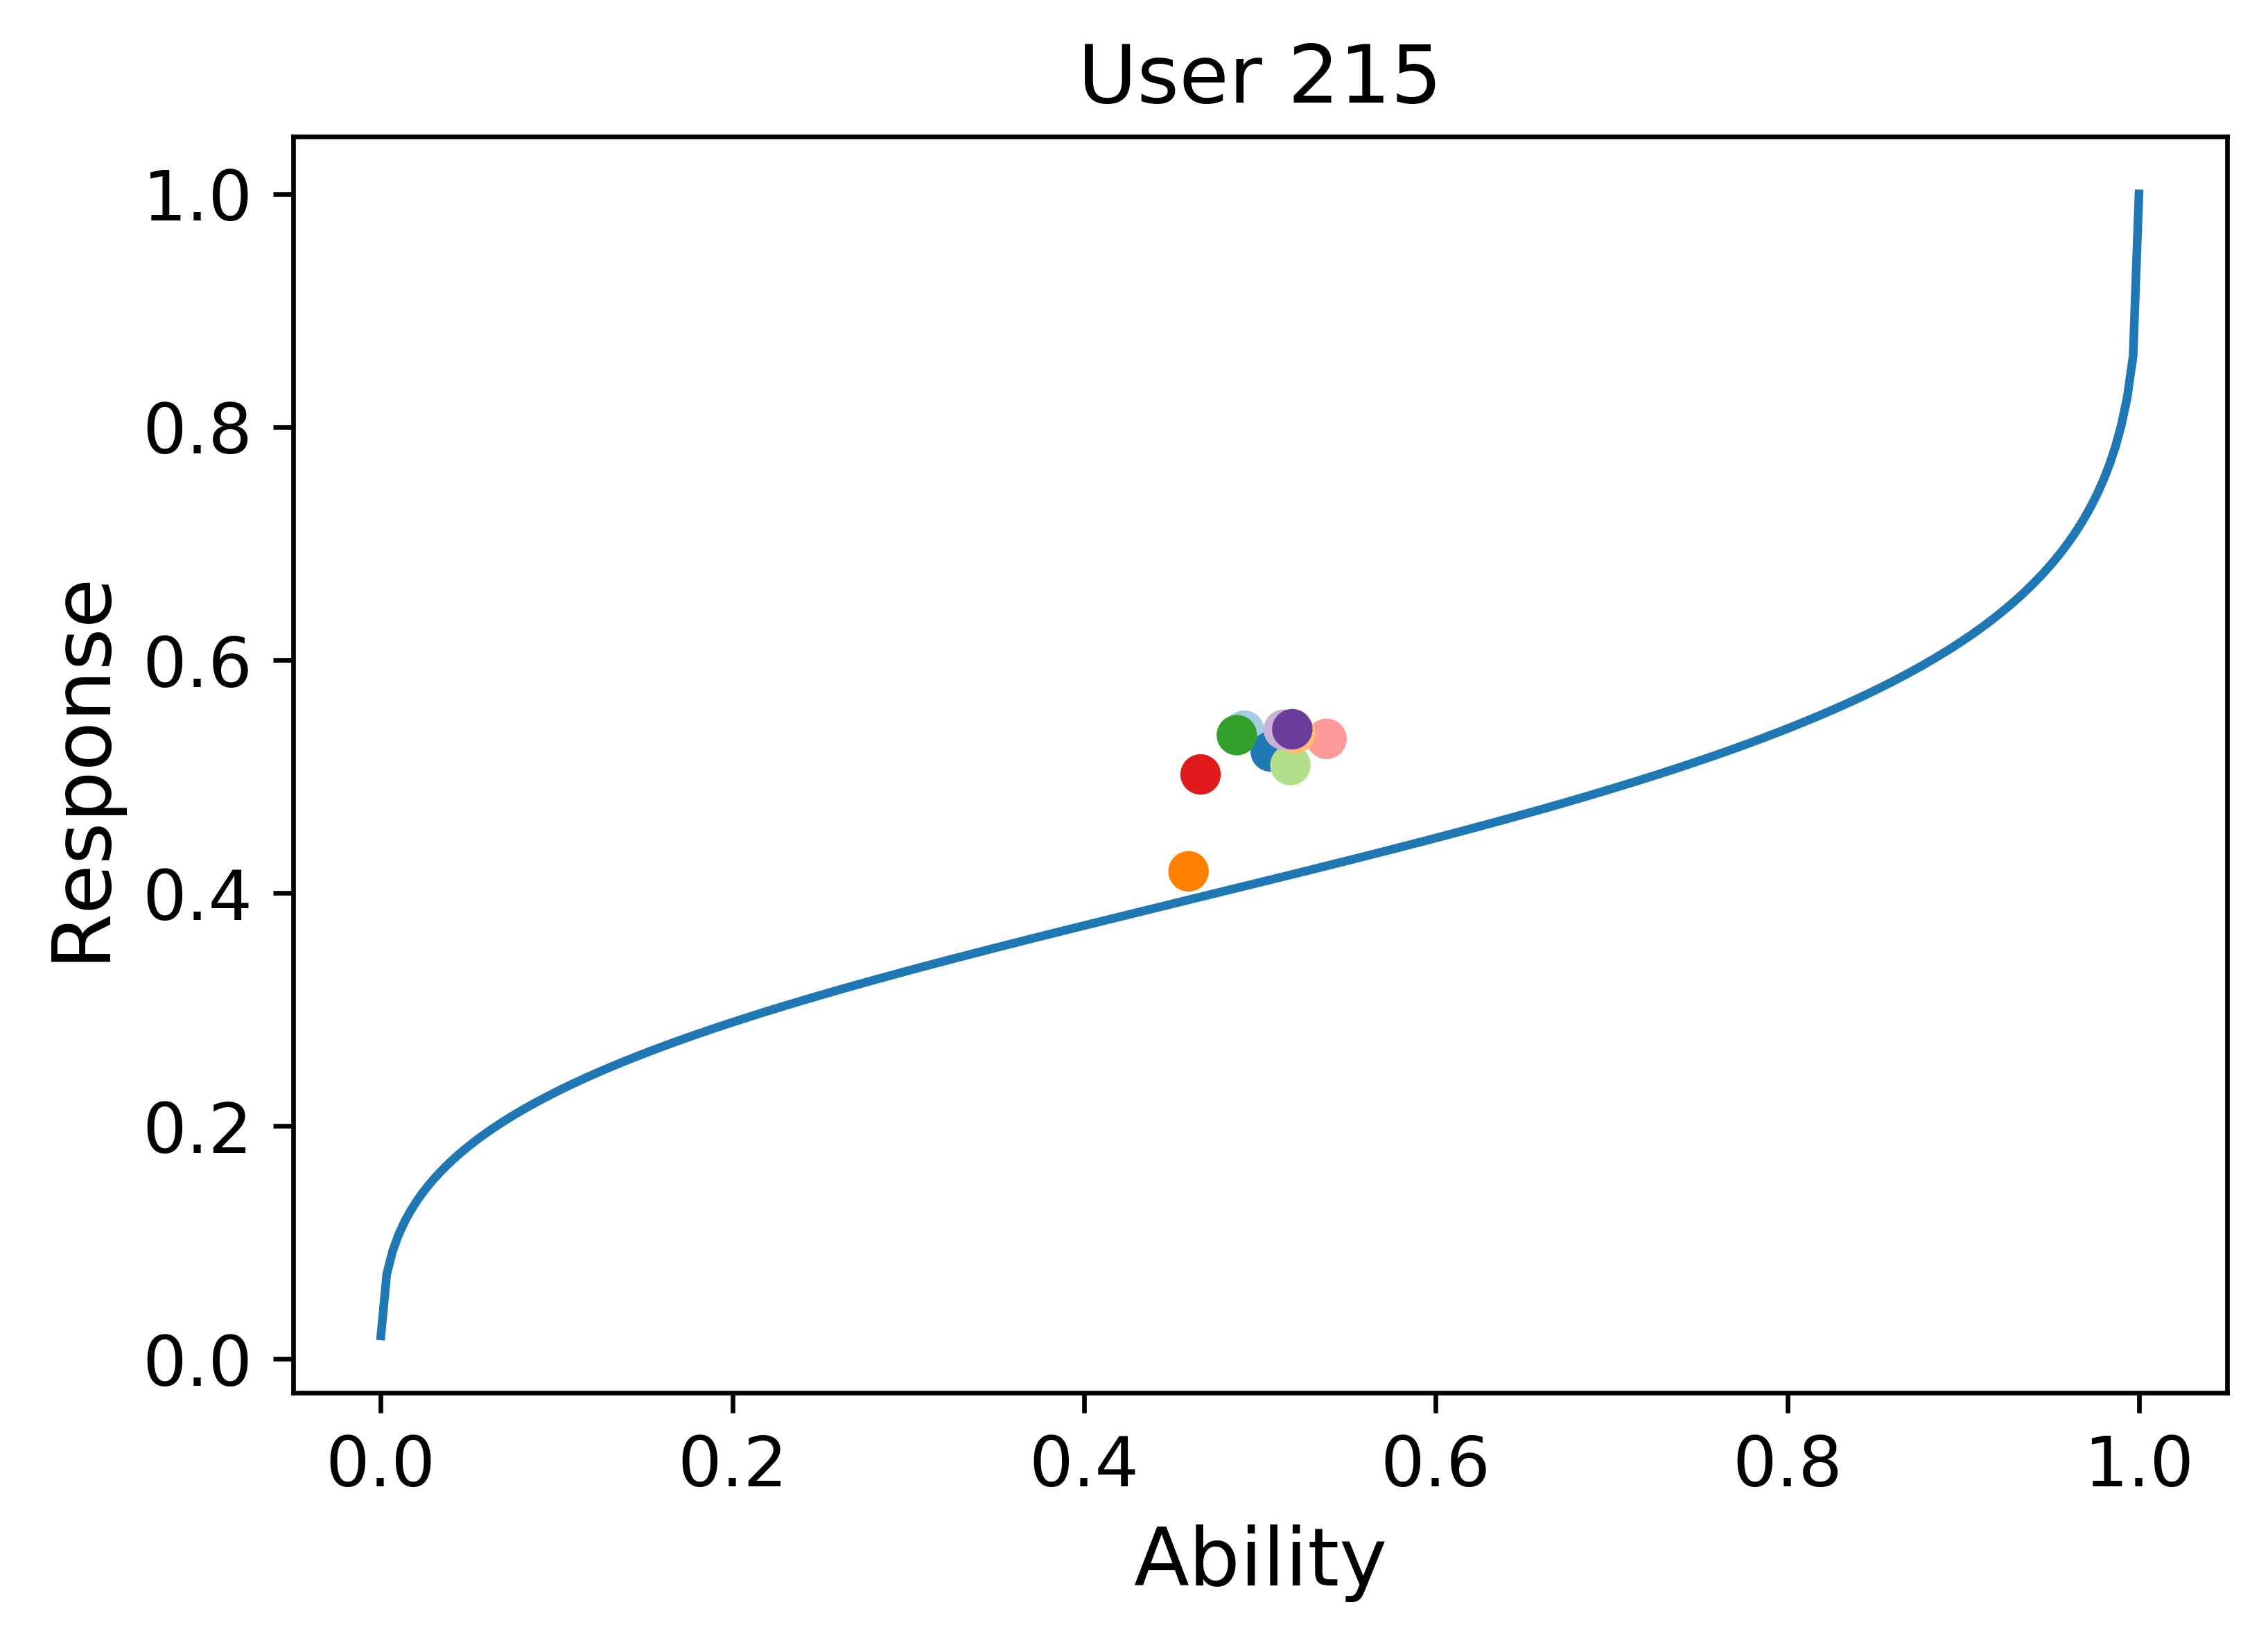

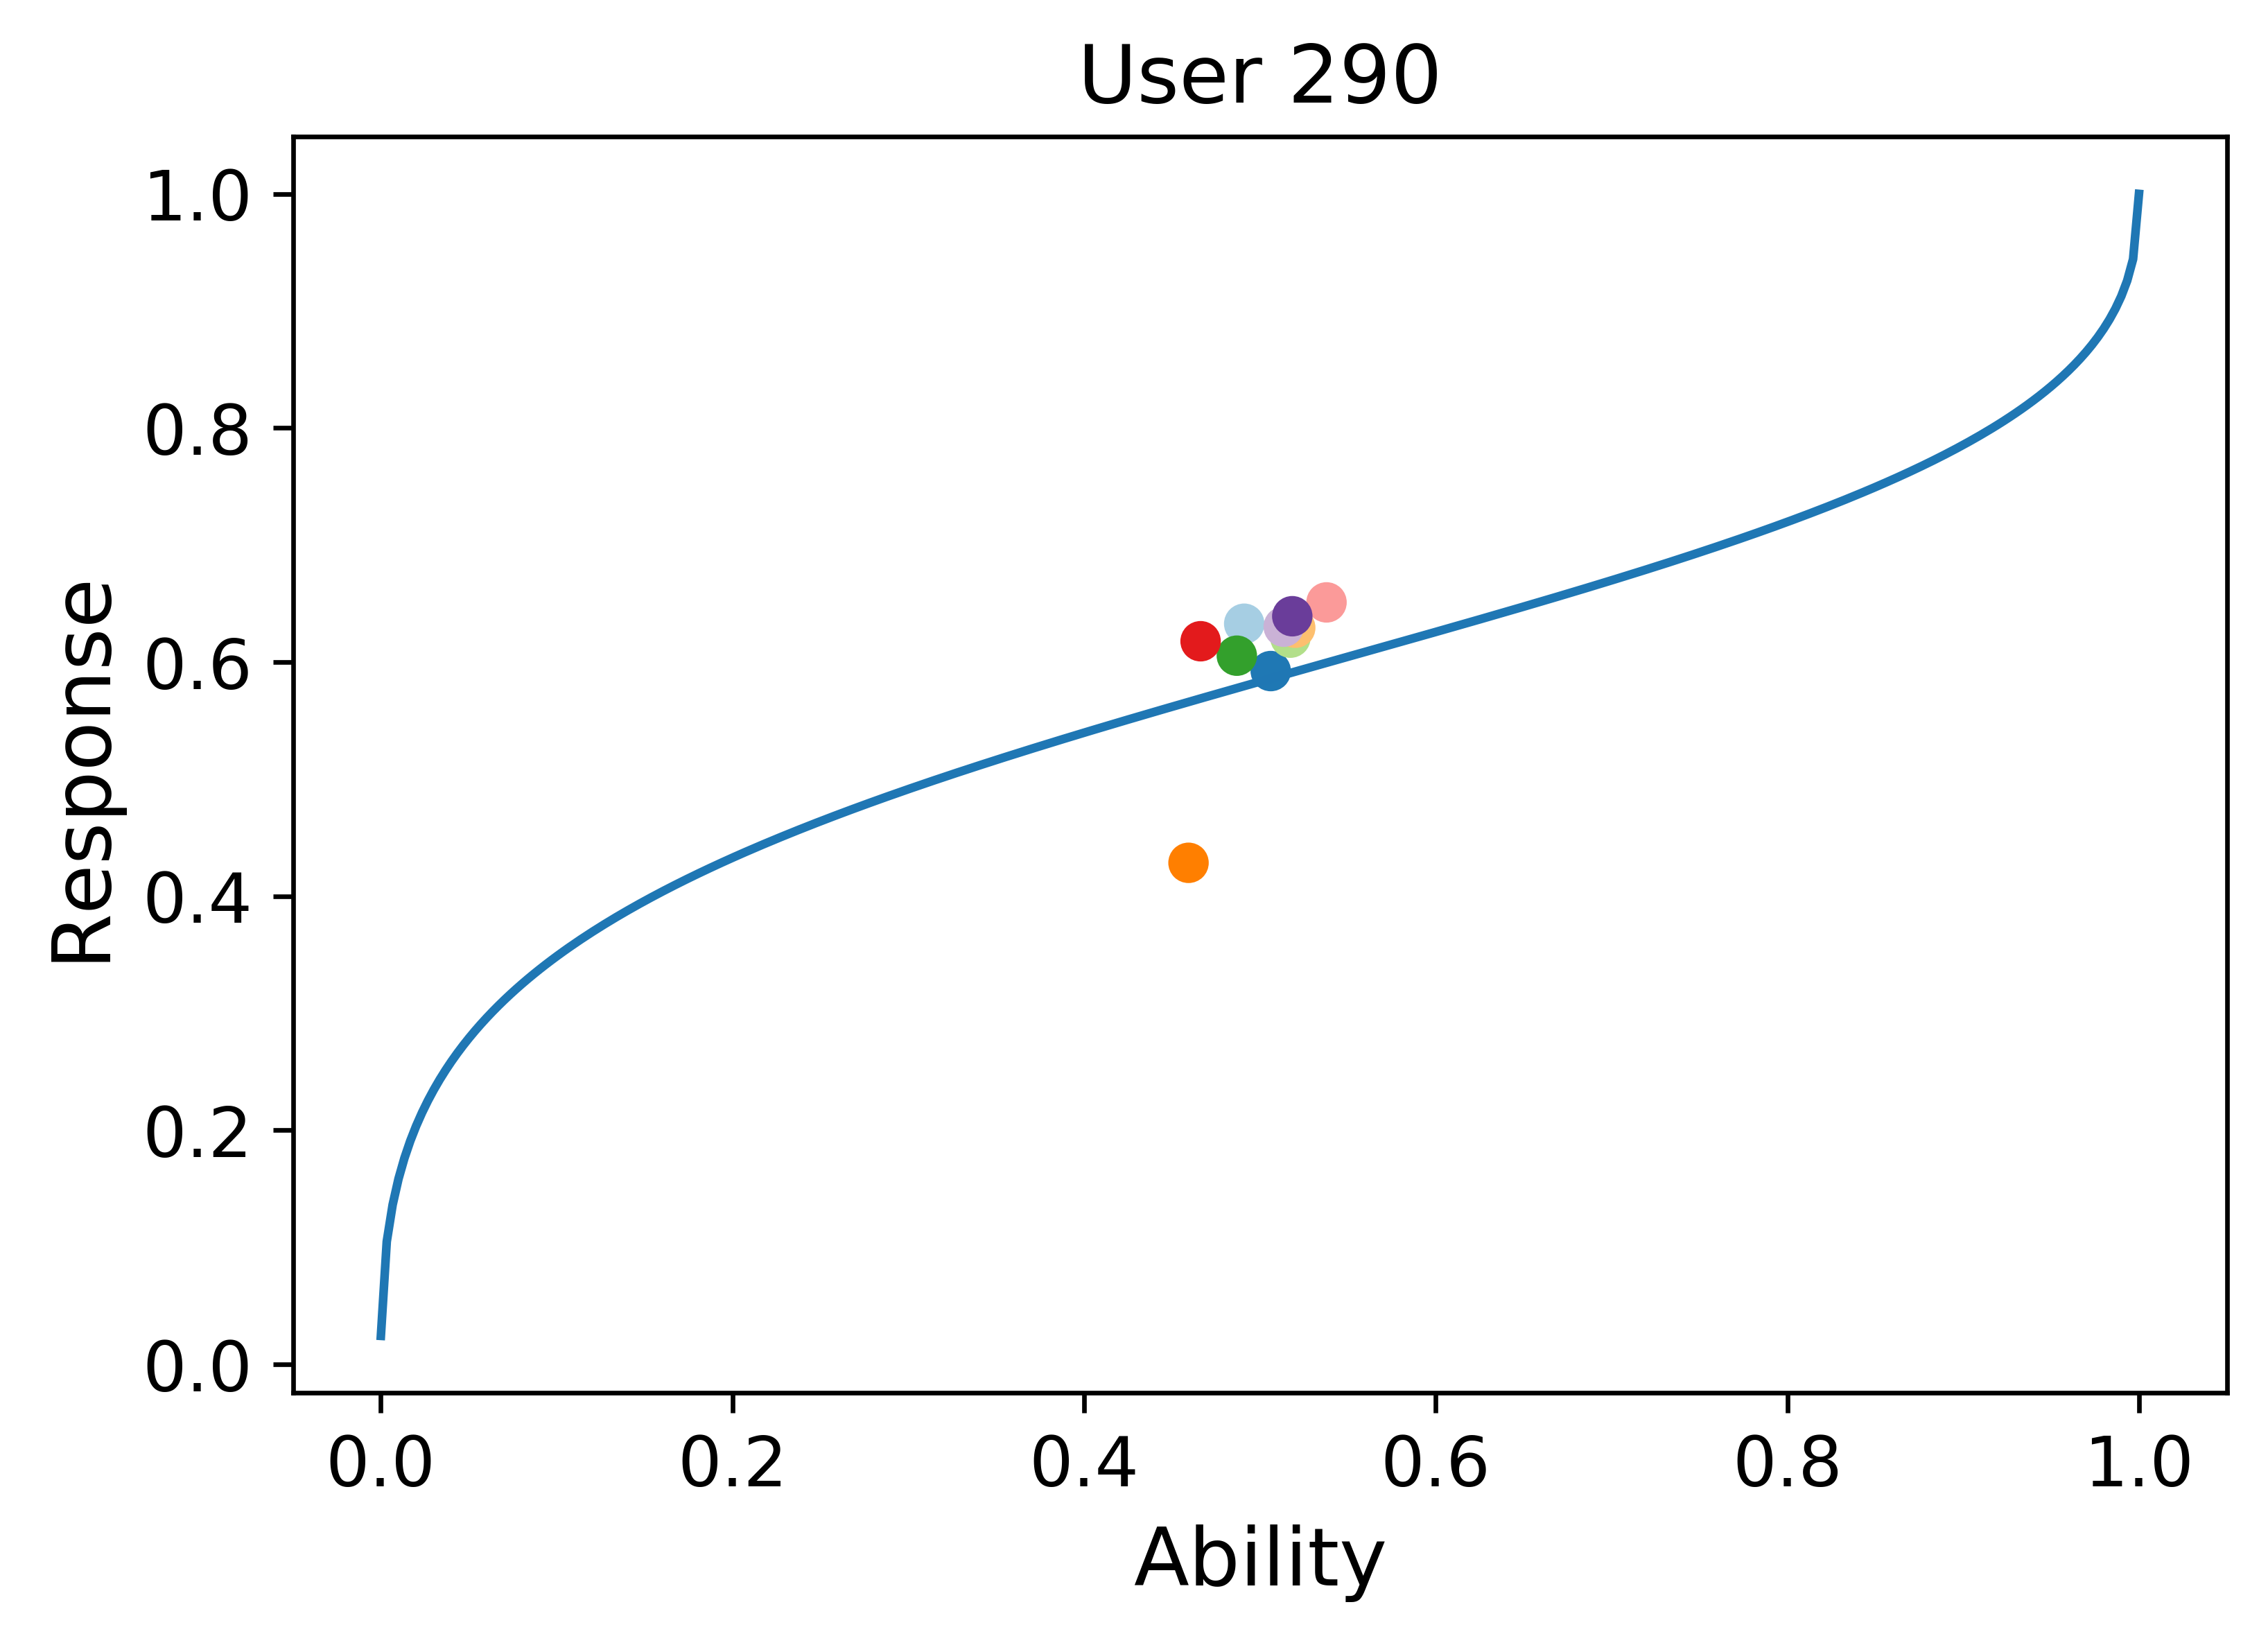

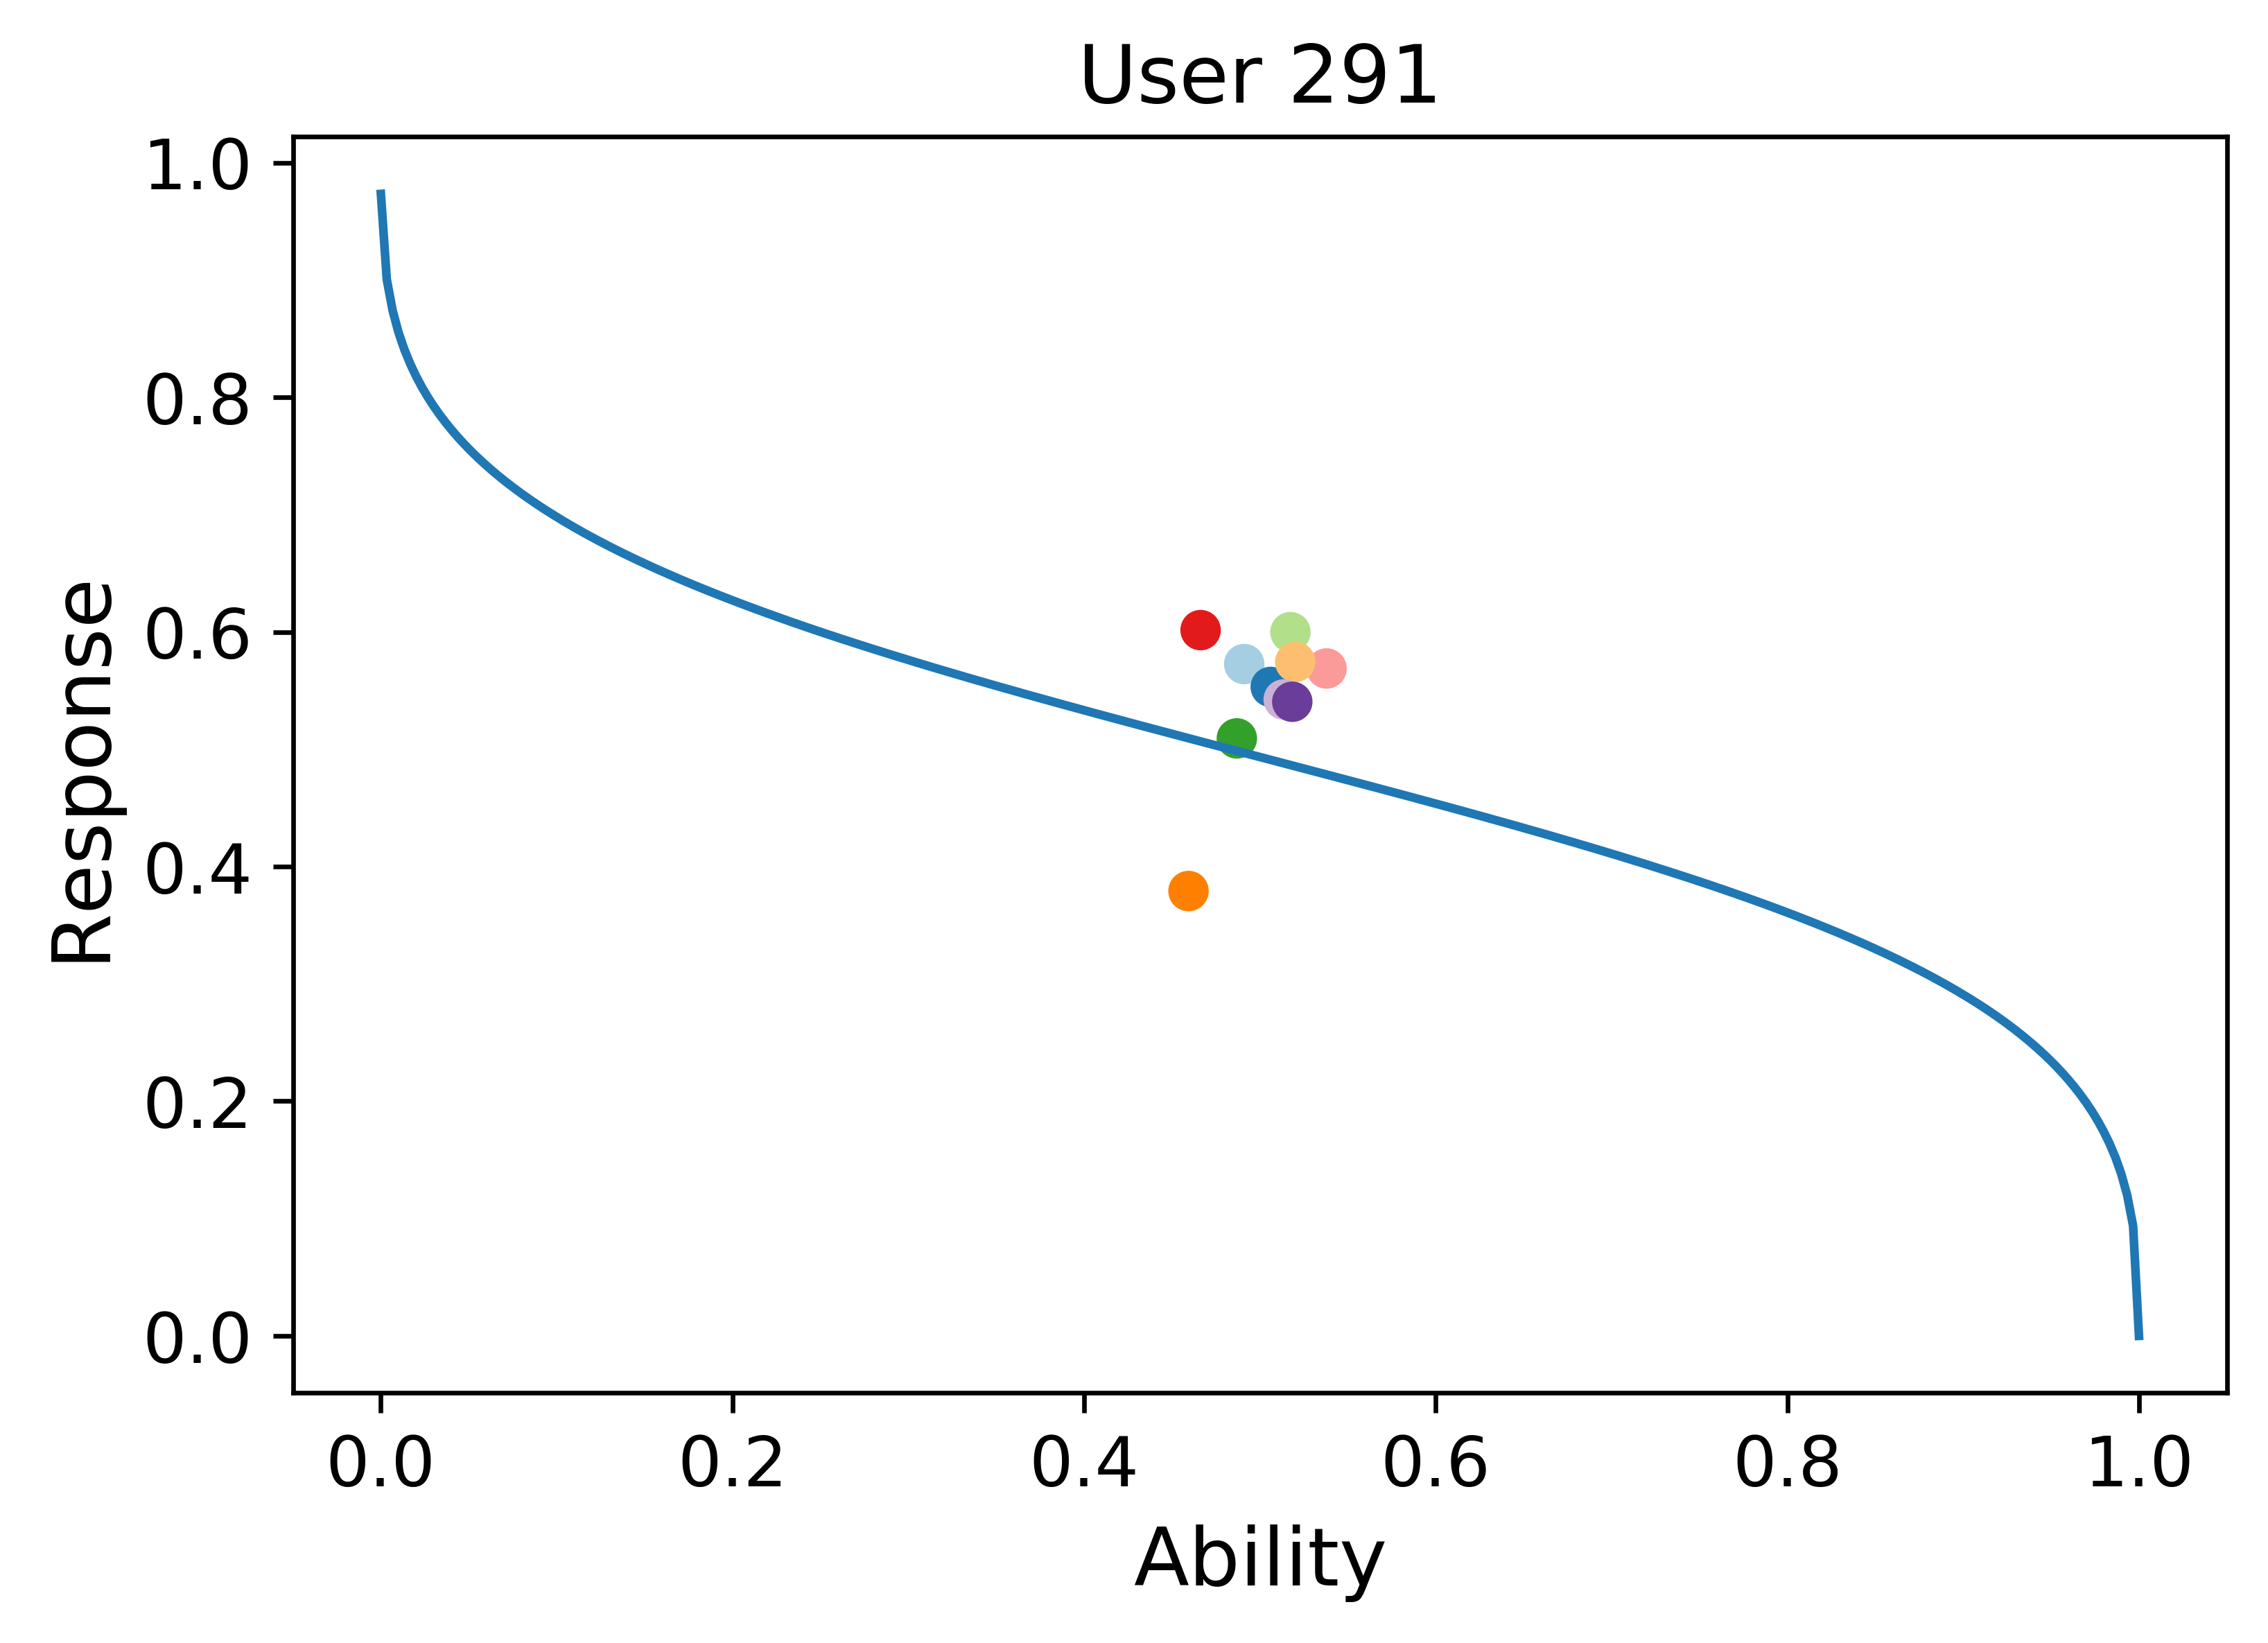

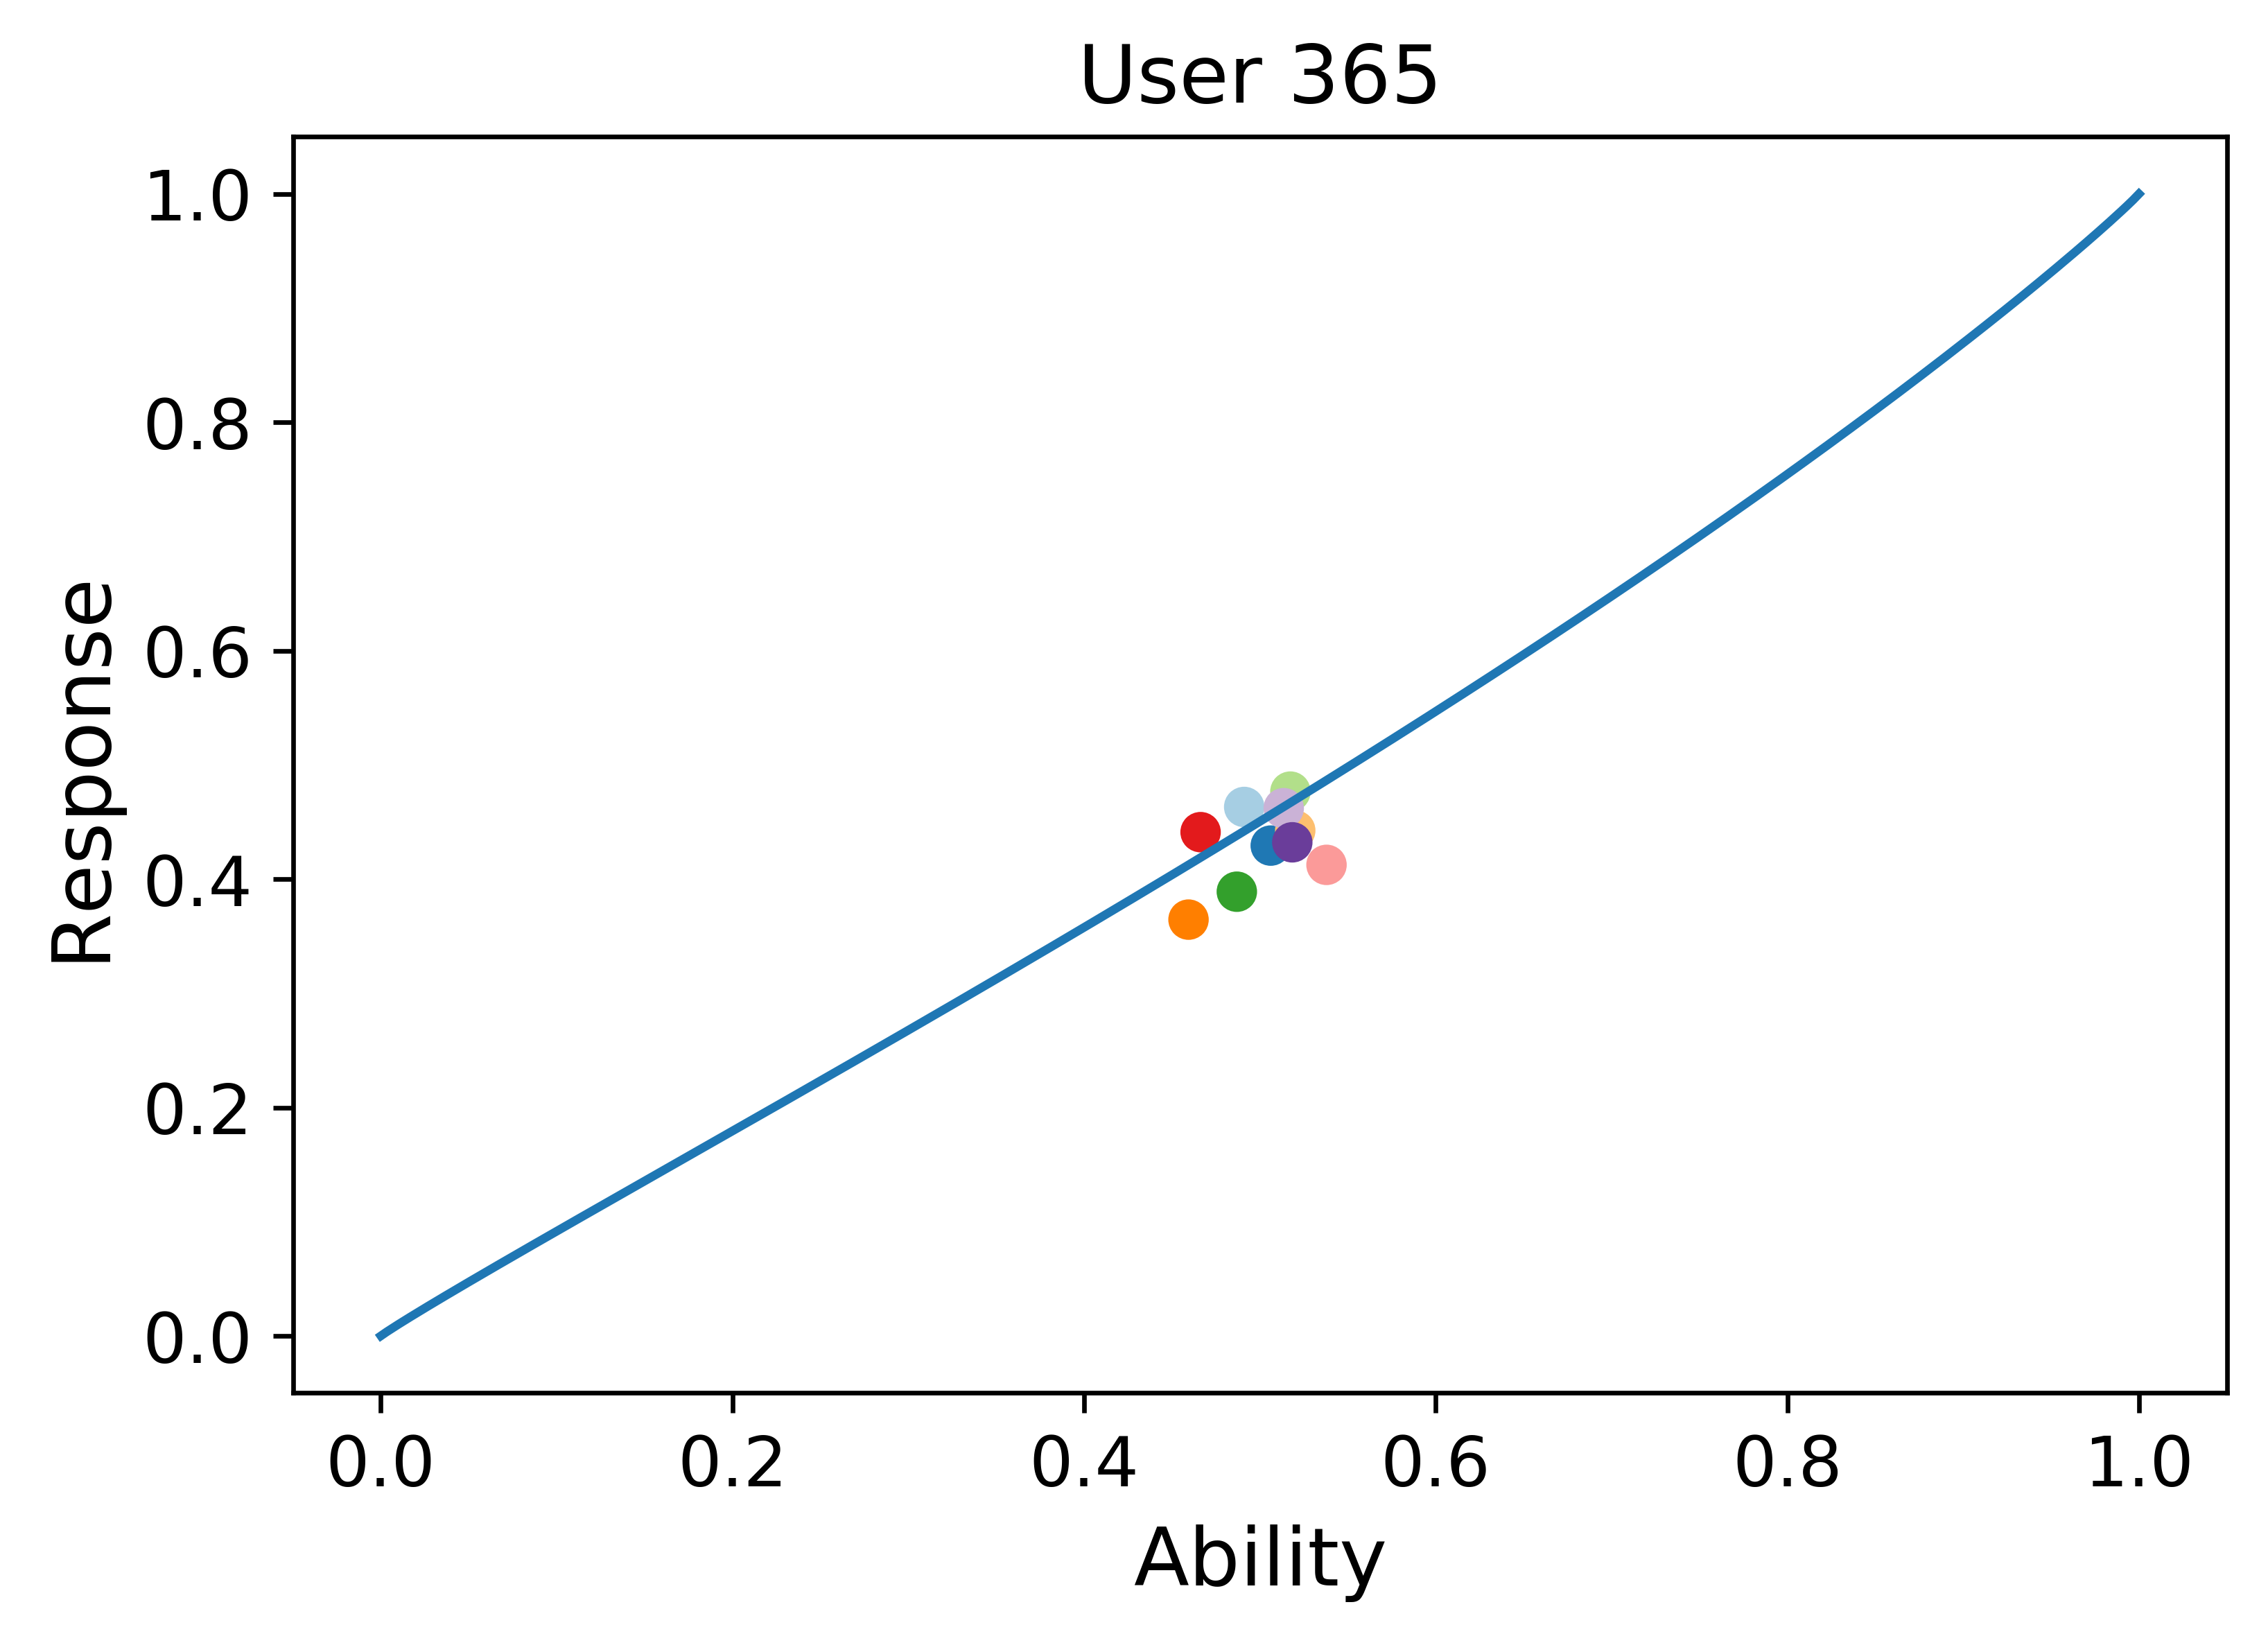

In [25]:
##### UNIFORMELY DISTRIBUTED ABILITIES (0,1) #####
ab_lins = np.linspace(0.0001, 1, num = 300)

for i, param in enumerate(params):
    if users[i] in ['215', '290', '291', '365']:
        fig, ax = plt.subplots(figsize=(6, 4), dpi=600)

        exp_responses = []
        for ab in ab_lins:
            exp_responses.append(beta_irt(thetai = ab,\
                                          deltaj = param[0],\
                                          aj = param[1]))

        # Plot response curves
        ax.plot(ab_lins, exp_responses)
        ax.scatter(abilities_v, responses[i], c=colors)

#         patches = []
#         for j, (name, _) in enumerate(abilities):
#             patches.append(mpatches.Patch(color=colors[j], label=name))
#         lgd = plt.legend(handles=patches, bbox_to_anchor=(1 ,1), fontsize=14)

        ax.set_xlabel('Ability', fontsize=14)
        ax.set_ylabel('Response', fontsize=14)
        ax.set_title('User {}'.format(users[i]), fontsize=14)
        ax.tick_params(labelsize=12)
        fig.savefig('./analysis_{}.png'.format(users[i]), bbox_inches='tight')

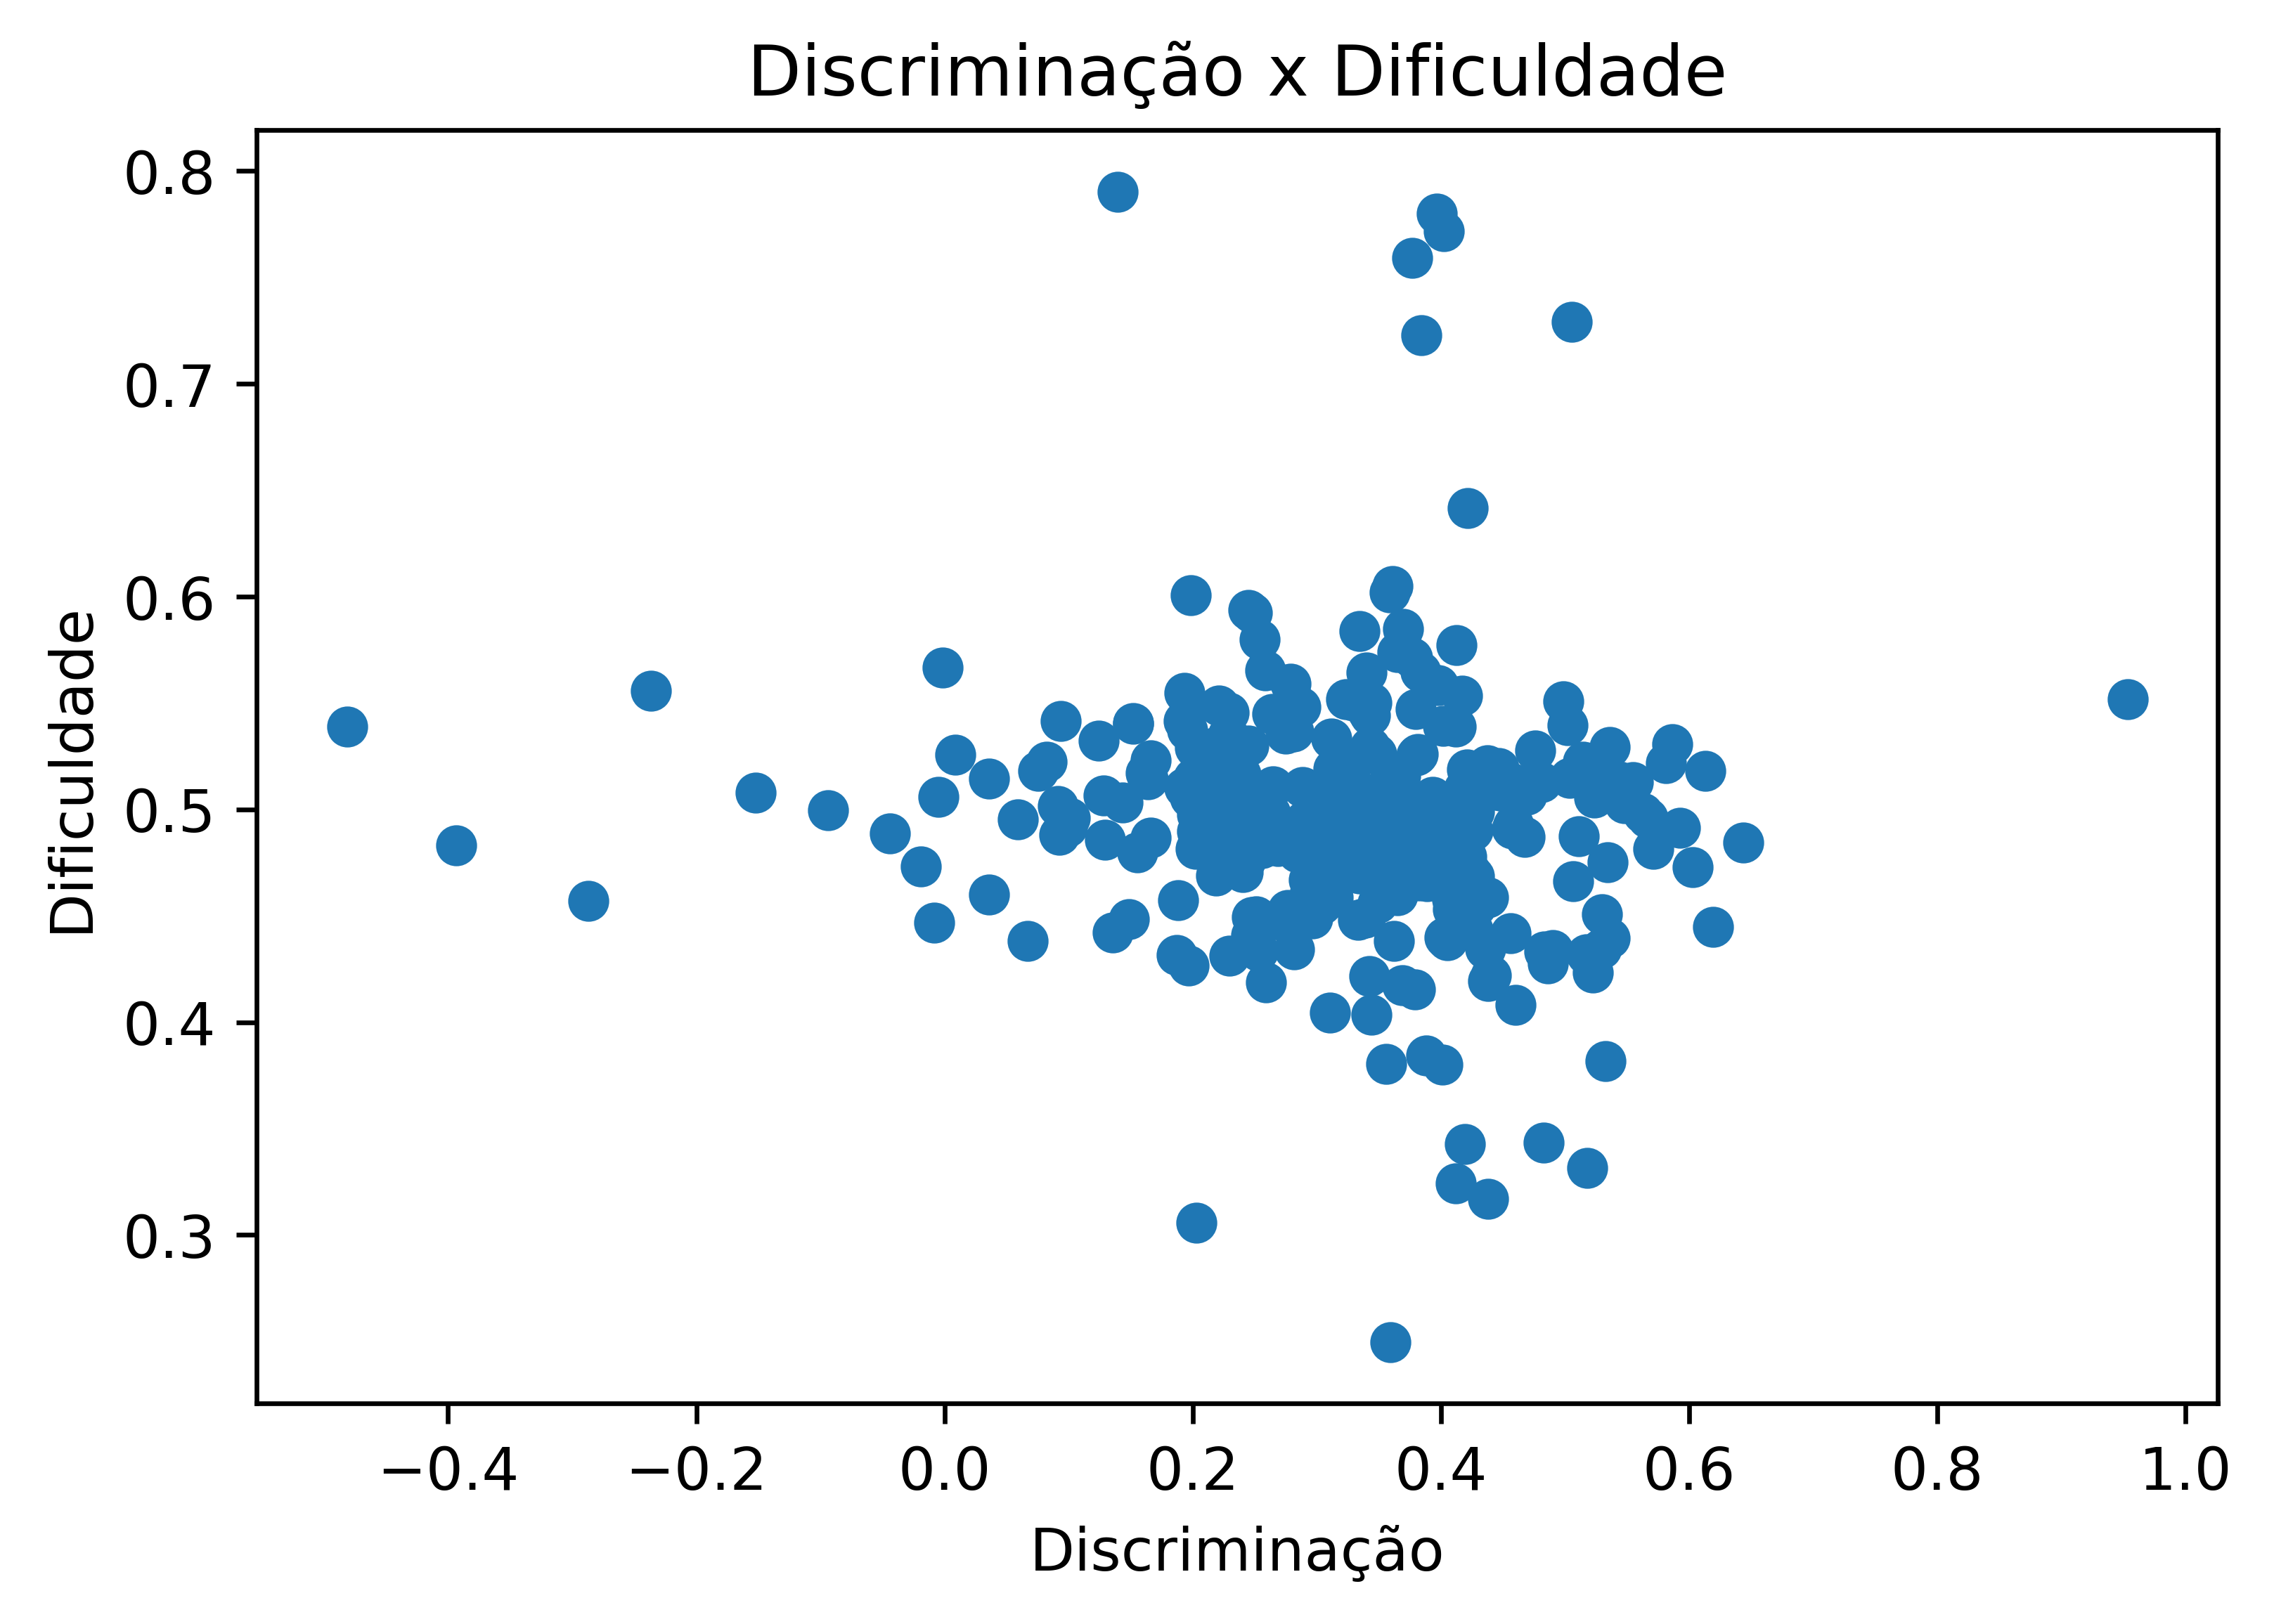

In [55]:
plt.figure(figsize = (6,4), dpi=600)
plt.scatter(y=[difficulty for difficulty, _ in params], x=[discrimination for _, discrimination in params])
plt.xlabel('Discriminação')
plt.ylabel('Dificuldade')
plt.title('Discriminação x Dificuldade')
plt.savefig('./charts/rmse/difficulty_discrimination.png', bbox_inches='tight')
plt.show()

In [8]:
result = json.load(open('./Results/Surprise/rmse/rmse_results.json'))
result.keys()

dict_keys(['BaselineOnly', 'CoClustering', 'KNNBasic_ItemBased', 'KNNBasic_UserBased', 'KNNWithMeans_ItemBased', 'KNNWithMeans_UserBased', 'NMF', 'NormalPredictor', 'SVD', 'SlopeOne'])

In [55]:
abilities

array([['BaselineOnly', 0.4911056],
       ['CoClustering', 0.506204],
       ['KNNBasic_ItemBased', 0.5173763],
       ['KNNBasic_UserBased', 0.48691717],
       ['KNNWithMeans_ItemBased', 0.5379228],
       ['KNNWithMeans_UserBased', 0.4663052],
       ['NMF', 0.5201365],
       ['NormalPredictor', 0.45943874],
       ['SVD', 0.5135856],
       ['SlopeOne', 0.51845795]], dtype=object)

In [12]:
avg_response = [sum(alg)/300 for alg in list(map(list, zip(*responses)))]

In [67]:
avg_response

[0.5532216947942791,
 0.5346127628318607,
 0.5327611315739841,
 0.5252068508406066,
 0.5440839891790674,
 0.5435536247566578,
 0.5337769733348608,
 0.4200816420497482,
 0.5511885489993869,
 0.5445829963512887]

In [19]:
from operator import itemgetter

sorted(abilities, key=itemgetter(1))
abilities

array([['BaselineOnly', 0.4911056],
       ['CoClustering', 0.506204],
       ['KNNBasic_ItemBased', 0.5173763],
       ['KNNBasic_UserBased', 0.48691717],
       ['KNNWithMeans_ItemBased', 0.5379228],
       ['KNNWithMeans_UserBased', 0.4663052],
       ['NMF', 0.5201365],
       ['NormalPredictor', 0.45943874],
       ['SVD', 0.5135856],
       ['SlopeOne', 0.51845795]], dtype=object)

In [44]:
len([ability for alg, ability in abilities if alg != 'NormalPredictor'])

9

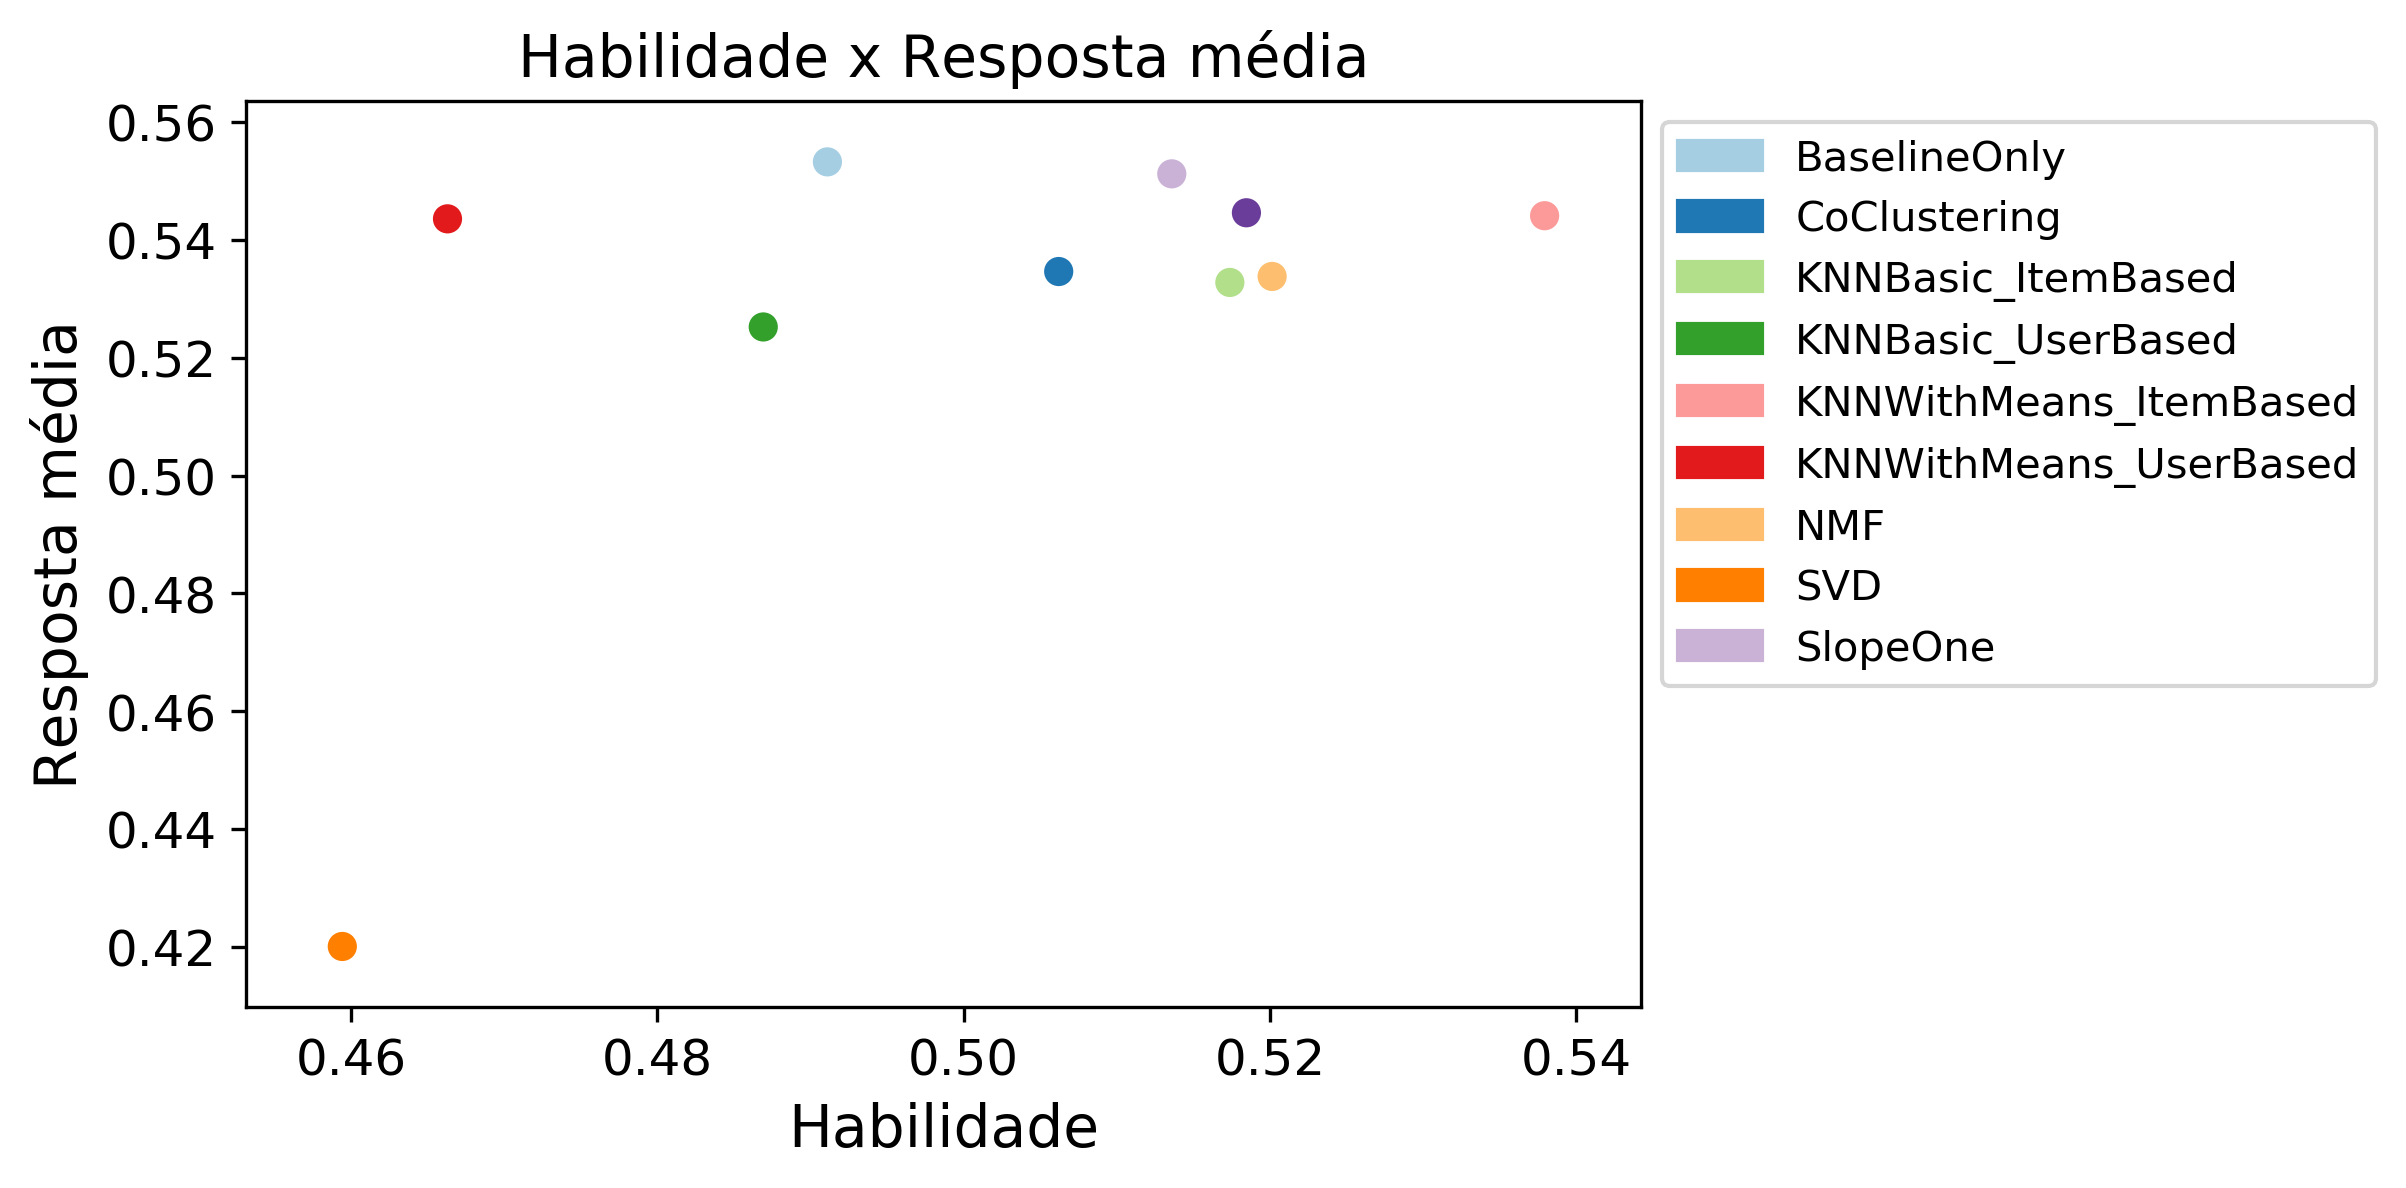

In [23]:
plt.figure(figsize = (6,4), dpi=300)
plt.scatter(y=avg_response, x=[ability for alg, ability in abilities], c=colors)

plt.xlabel('Habilidade', fontsize=14)
plt.ylabel('Resposta média', fontsize=14)
plt.title('Habilidade x Resposta média', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

patches = []
for j, (name, _) in enumerate([ability for ability in abilities if ability[0] != 'NormalPredictor']):
    patches.append(mpatches.Patch(color=colors[j], label=name))
lgd = plt.legend(handles=patches, bbox_to_anchor=(1, 1))

plt.savefig('./charts/rmse/avg_response_ability2.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [10]:
avg_response_per_user = [sum(user_response)/10 for user_response in responses]

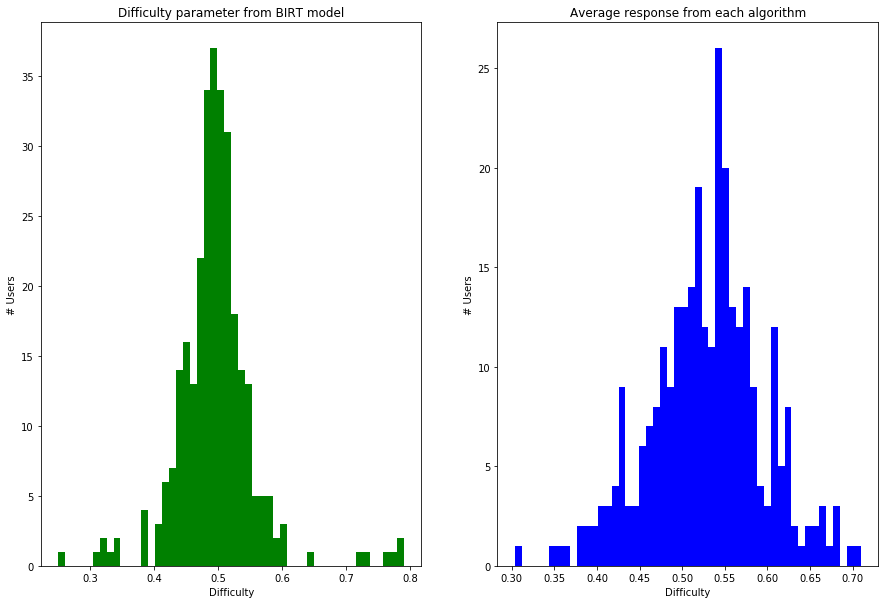

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
ax[0].hist([difficulty for difficulty, _ in params], bins=50, color = 'g')
ax[0].set_title('Difficulty parameter from BIRT model')
ax[1].hist(avg_response_per_user, bins=50, color = 'b')
ax[1].set_title('Average response from each algorithm')

for ax_ in ax:
    ax_.set_xlabel('Difficulty')
    ax_.set_ylabel('# Users')

In [11]:
user_difficulty = list(zip(users,[difficulty for difficulty, _ in params]))
user_responses = list(zip(users,responses))

easy_user = list(filter(lambda x: x[1] <= 0.4, user_difficulty))
medium_user = list(filter(lambda x: x[1] > 0.4 and x[1] < 0.6, user_difficulty))
hard_user = list(filter(lambda x: x[1] >= 0.6, user_difficulty))

In [12]:
easy_alg = list(filter(lambda x: x[0] in list(map(lambda x: x[0], easy_user)), user_responses))
medium_alg = list(filter(lambda x: x[0] in list(map(lambda x: x[0], medium_user)), user_responses))
hard_alg = list(filter(lambda x: x[0] in list(map(lambda x: x[0], hard_user)), user_responses))

In [13]:
list(map(lambda x: x[1], easy_alg))

[array([0.63272103, 0.59227534, 0.62081888, 0.60542216, 0.65094906,
        0.61776058, 0.62929585, 0.42842926, 0.63018703, 0.63912766]),
 array([0.53836511, 0.47173114, 0.55546762, 0.55685446, 0.53731388,
        0.48471545, 0.54263663, 0.4094474 , 0.56172929, 0.54010803]),
 array([0.59811964, 0.55923595, 0.53436677, 0.58674452, 0.60433312,
        0.59456493, 0.66466755, 0.40292028, 0.58281602, 0.61238116]),
 array([0.61694754, 0.62076678, 0.5617827 , 0.61573103, 0.62451013,
        0.63389274, 0.61999528, 0.49047401, 0.6138761 , 0.64849947]),
 array([0.60399727, 0.53532002, 0.59531878, 0.52805227, 0.54914504,
        0.56732   , 0.57064198, 0.45965839, 0.60738745, 0.58632025]),
 array([0.63157509, 0.60691557, 0.63763589, 0.61144735, 0.60908243,
        0.61290693, 0.60880199, 0.46867054, 0.64701264, 0.60419968]),
 array([0.75285275, 0.76838687, 0.6814297 , 0.54219602, 0.74497463,
        0.74620198, 0.74353678, 0.38506742, 0.70745234, 0.75864683]),
 array([0.53419036, 0.53356678, 0.

In [14]:
easy = [sum(alg)/len(easy_alg) for alg in list(map(list, zip(*list(map(lambda x: x[1], easy_alg)))))]
medium = [sum(alg)/len(medium_alg) for alg in list(map(list, zip(*list(map(lambda x: x[1], medium_alg)))))]
hard = [sum(alg)/len(hard_alg) for alg in list(map(list, zip(*list(map(lambda x: x[1], hard_alg)))))]

algs_by_difficulty = list(zip([name for name, _ in abilities], list(map(list, zip(*[easy, medium, hard])))))

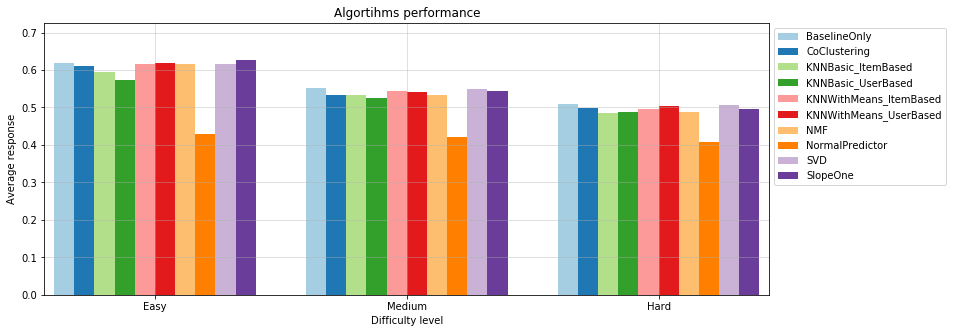

In [15]:
# Setting the positions and width for the bars
pos = [0, 1, 2]
x_labels = ['Easy', 'Medium', 'Hard']
width = 0.08

# Plotting the bars
fig, ax = plt.subplots(figsize=(13,5))

for index, (name, response) in enumerate(algs_by_difficulty):
    # Create a bar with pre_score data, in position pos,
    plt.bar([p + width*index for p in pos], 
            #using df['pre_score'] data,
            response, 
            # of width
            width, 
            # with color
            color=colors[index])

# Set the y axis label
ax.set_ylabel('Average response')
ax.set_xlabel('Difficulty level')

# Set the chart's title
ax.set_title('Algortihms performance')

# Set the position of the x ticks
ax.set_xticks([p + 4.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Easy', 'Medium', 'Hard'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*10)
plt.ylim([0, max(easy + medium + hard)+0.1])

# Adding the legend and showing the plot
plt.legend([name for name, _ in algs_by_difficulty], loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)
plt.show()

In [24]:
diff_response = list(zip(users, [difficulty for difficulty, _ in params], responses))

to_plot = {}
for alg in abilities_n:
    to_plot[alg] = []
    
to_plot['all'] = []

for user, difficulty, response in diff_response:
    to_plot['all'].append([int(user), difficulty, sum(response)/len(response)])
    for alg, alg_response in list(zip(abilities_n, response)):
        to_plot[alg].append([int(user), difficulty, alg_response])

In [26]:
import csv

for filename in to_plot:
    with open("{}.csv".format(filename), "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(to_plot[filename])

In [124]:
original_results = json.load(open('./Results/Surprise/rmse/rmse_results.json'))

In [127]:
abilities_n

['BaselineOnly',
 'CoClustering',
 'KNNBasic_ItemBased',
 'KNNBasic_UserBased',
 'KNNWithMeans_ItemBased',
 'KNNWithMeans_UserBased',
 'NMF',
 'NormalPredictor',
 'SVD',
 'SlopeOne']

In [157]:
algs = list(original_results.keys())
rmse = []
for alg in algs:
    rmse.append(mean([result['RMSE'] for result in original_results[alg].values()]))

In [161]:
rmse_ = list(zip(algs, rmse))
rmse_.sort(key=lambda x: x[1])

In [162]:
rmse_

[('BaselineOnly', 0.8439615424551474),
 ('SVD', 0.850088870409984),
 ('SlopeOne', 0.8734401357712359),
 ('KNNWithMeans_ItemBased', 0.8736255002754553),
 ('KNNWithMeans_UserBased', 0.8760009579167243),
 ('CoClustering', 0.9067442346594113),
 ('NMF', 0.9092056615990343),
 ('KNNBasic_ItemBased', 0.9145577562740939),
 ('KNNBasic_UserBased', 0.9452437148236388),
 ('NormalPredictor', 1.4076900507134302)]